1. high cor over 0.8 with highest h2g
2. blood biochemistry(testoterone, IGF-1)
3. sex specific analysis between left_ear-right_ear vs our hip phenotypes

In [2]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import pearsonr
import math
import pydicom
from show_keypoints import show_keypoints
import matplotlib.cm as cm
import scipy.stats as stats
from PIL import Image, ImageDraw
import os
import re
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## All phenotypes correlation

In [2]:
hip_pheno_flt = pd.read_csv('key_results/hip_pheno_23_norm_height_flt_eid_flt.csv', index_col=0); hip_pheno_flt

file_name  Patient EID  \
image_id                                                                   
08760_93  1.2.840.113619.2.110.210419.20160630134650.1.1...      1000276   
12347_93  1.2.840.113619.2.110.210419.20170305174208.1.1...      1000742   
14366_82  1.2.840.113619.2.110.212038.20190307144208.1.1...      1000951   
06366_93  1.2.840.113619.2.110.210419.20151211144320.1.1...      1001025   
14857_93  1.2.840.113619.2.110.210419.20170902122319.1.1...      1001091   
...                                                     ...          ...   
12964_93  1.2.840.113619.2.110.210419.20170418184226.1.1...      6024029   
02193_82  1.2.840.113619.2.110.210419.20180811105258.1.1...      6024037   
11798_82  1.2.840.113619.2.110.212038.20180618143159.1.1...      6024119   
04905_82  1.2.840.113619.2.110.210419.20190219154149.1.1...      6024257   
02700_82  1.2.840.113619.2.110.210419.20180912183226.1.1...      6024532   

         p_sex  p_age  p_weight  p_height  iliac_crest_left2iliac_crest_right  \
image_id                                                                        
08760_93     F   67.0      60.0     159.0                            0.119177   
12347_93     F   67.0      77.0     161.0                            0.123848   
14366_82     M   78.0      60.0     170.0                            0.113652   
06366_93     F   55.0      69.0     167.0                            0.115559   
14857_93     F   60.0      65.0     162.0                            0.119257   
...        ...    ...       ...       ...                                 ...   
12964_93     M   50.0      79.0     180.0                            0.115447   
02193_82     M   61.0      84.0     181.0                            0.109468   
11798_82     M   68.0      70.0     165.0                            0.117222   
04905_82     M   71.0      74.0     169.0                            0.121064   
02700_82     M   67.0      75.0     175.0                            0.112109   

          iliac_crest_left2iliac_spine_left  \
image_id                                      
08760_93                           0.057544   
12347_93                           0.038570   
14366_82                           0.036685   
06366_93                           0.055194   
14857_93                           0.037780   
...                                     ...   
12964_93                           0.030139   
02193_82                           0.046472   
11798_82                           0.031103   
04905_82                           0.039582   
02700_82                           0.043879   

          iliac_crest_left2iliac_spine_right  \
image_id                                       
08760_93                            0.161311   
12347_93                            0.155576   
14366_82                            0.147139   
06366_93                            0.162427   
14857_93                            0.155524   
...                                      ...   
12964_93                            0.141083   
02193_82                            0.139892   
11798_82                            0.146952   
04905_82                            0.151179   
02700_82                            0.150154   

          iliac_crest_left2iliopubic_eminence_left  ...  \
image_id                                            ...   
08760_93                                  0.092231  ...   
12347_93                                  0.084050  ...   
14366_82                                  0.075637  ...   
06366_93                                  0.083520  ...   
14857_93                                  0.079466  ...   
...                                            ...  ...   
12964_93                                  0.076052  ...   
02193_82                                  0.080300  ...   
11798_82                                  0.078930  ...   
04905_82                                  0.079783  ...   
02700_82                                  0.082683  ...   

  

#### Left and right average

In [63]:
df = hip_pheno_flt.copy()
df = df.iloc[:, 3:]
df

p_age  p_weight  p_height  iliac_crest_left2iliac_crest_right  \
image_id                                                                  
08760_93   67.0      60.0     159.0                            0.119177   
12347_93   67.0      77.0     161.0                            0.123848   
14366_82   78.0      60.0     170.0                            0.113652   
06366_93   55.0      69.0     167.0                            0.115559   
14857_93   60.0      65.0     162.0                            0.119257   
...         ...       ...       ...                                 ...   
12964_93   50.0      79.0     180.0                            0.115447   
02193_82   61.0      84.0     181.0                            0.109468   
11798_82   68.0      70.0     165.0                            0.117222   
04905_82   71.0      74.0     169.0                            0.121064   
02700_82   67.0      75.0     175.0                            0.112109   

          iliac_crest_left2iliac_spine_left  \
image_id                                      
08760_93                           0.057544   
12347_93                           0.038570   
14366_82                           0.036685   
06366_93                           0.055194   
14857_93                           0.037780   
...                                     ...   
12964_93                           0.030139   
02193_82                           0.046472   
11798_82                           0.031103   
04905_82                           0.039582   
02700_82                           0.043879   

          iliac_crest_left2iliac_spine_right  \
image_id                                       
08760_93                            0.161311   
12347_93                            0.155576   
14366_82                            0.147139   
06366_93                            0.162427   
14857_93                            0.155524   
...                                      ...   
12964_93                            0.141083   
02193_82                            0.139892   
11798_82                            0.146952   
04905_82                            0.151179   
02700_82                            0.150154   

          iliac_crest_left2iliopubic_eminence_left  \
image_id                                             
08760_93                                  0.092231   
12347_93                                  0.084050   
14366_82                                  0.075637   
06366_93                                  0.083520   
14857_93                                  0.079466   
...                                            ...   
12964_93                                  0.076052   
02193_82                                  0.080300   
11798_82                                  0.078930   
04905_82                                  0.079783   
02700_82                                  0.082683   

          iliac_crest_left2iliopubic_eminence_right  \
image_id                                              
08760_93                                   0.161052   
12347_93                                   0.159198   
14366_82                                   0.147038   
06366_93                                   0.157159   
14857_93                                   0.155074   
...                                             ...   
12964_93                                   0.142842   
02193_82                                   0.143638   
11798_82                                   0.149576   
04905_82                                   0.153874   
02700_82                                   0.151725   

          iliac_crest_left2inferior_pubic_ramus_left  \
image_id                                               
08760_93                                    0.145886   
12347_93                                    0.142365   
14366_82                                    0.135329   
06366_93                                    0.136728   
14857_93                                  

In [4]:
averages_df = pd.DataFrame(index=df.index)

def calculate_average(df, col1, col2):
    if col2 is None:
        return
    avg_col_name = f'avg_{col1}_and_{col2}'
    averages_df[avg_col_name] = (df[col1] + df[col2]) / 2

def match_columns(column):
    pattern1 = re.compile(r'^(.*?)_(left|right)2(.*?)_(left|right)$')
    pattern2 = re.compile(r'^(.*?)_(left|right)2(.*?)$')
    pattern3 = re.compile(r'^(.*?)2(.*?)_(left|right)$')
    match1 = pattern1.match(column)
    match2 = pattern2.match(column)
    match3 = pattern3.match(column)
    return match1, match2, match3

handled_columns = []

for col in df.columns:
    match1, match2, match3 = match_columns(col)
    
    if match1:
        base_name, side1, target_name, side2 = match1.groups()
        # remove diagonal
        if side1 != side2 and base_name != target_name:
            if "divide" not in col:
                continue
        other_side1 = 'left' if side1 == 'right' else 'right'
        other_side2 = 'left' if side2 == 'right' else 'right'
        other_col = f'{base_name}_{other_side1}2{target_name}_{other_side2}'
        
        if other_col in df.columns:
            if col not in handled_columns and other_col not in handled_columns:
                calculate_average(df, col, other_col)
                handled_columns.append(col)
                handled_columns.append(other_col)
        else:
            averages_df[col] = df[col]
            
    elif match2:
        base_name, side1, target_name = match2.groups()
        other_side = 'left' if side1 == 'right' else 'right'
        other_col = f'{base_name}_{other_side}2{target_name}'
        
        if other_col in df.columns:
            if col not in handled_columns and other_col not in handled_columns:
                calculate_average(df, col, other_col)
                handled_columns.append(col)
                handled_columns.append(other_col)
        else:
            averages_df[col] = df[col]
            
    elif match3:
        base_name, target_name, side2 = match3.groups()
        other_side = 'left' if side2 == 'right' else 'right'
        other_col = f'{base_name}2{target_name}_{other_side}'
        
        if other_col in df.columns:
            if col not in handled_columns and other_col not in handled_columns:
                calculate_average(df, col, other_col)
                handled_columns.append(col)
                handled_columns.append(other_col)
        else:
            averages_df[col] = df[col]
    else:
        averages_df[col] = df[col]

/var/folders/7f/jzt97g754236ldjj13l5pgd00000gn/T/ipykernel_84850/1096536709.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  averages_df[col] = df[col]


In [5]:
averages_df

p_age  p_weight  p_height  iliac_crest_left2iliac_crest_right  \
image_id                                                                  
08760_93   67.0      60.0     159.0                            0.119177   
12347_93   67.0      77.0     161.0                            0.123848   
14366_82   78.0      60.0     170.0                            0.113652   
06366_93   55.0      69.0     167.0                            0.115559   
14857_93   60.0      65.0     162.0                            0.119257   
...         ...       ...       ...                                 ...   
12964_93   50.0      79.0     180.0                            0.115447   
02193_82   61.0      84.0     181.0                            0.109468   
11798_82   68.0      70.0     165.0                            0.117222   
04905_82   71.0      74.0     169.0                            0.121064   
02700_82   67.0      75.0     175.0                            0.112109   

          avg_iliac_crest_left2iliac_spine_left_and_iliac_crest_right2iliac_spine_right  \
image_id                                                                                  
08760_93                                           0.053833                               
12347_93                                           0.037733                               
14366_82                                           0.036687                               
06366_93                                           0.054575                               
14857_93                                           0.038469                               
...                                                     ...                               
12964_93                                           0.030514                               
02193_82                                           0.042177                               
11798_82                                           0.032501                               
04905_82                                           0.037655                               
02700_82                                           0.043816                               

          avg_iliac_crest_left2iliopubic_eminence_left_and_iliac_crest_right2iliopubic_eminence_right  \
image_id                                                                                                
08760_93                                           0.090903                                             
12347_93                                           0.084275                                             
14366_82                                           0.075177                                             
06366_93                                           0.083363                                             
14857_93                                           0.078531                                             
...                                                     ...                                             
12964_93                                           0.076575                                             
02193_82                                           0.080787                                             
11798_82                                           0.078031                                             
04905_82                                           0.080025                                             
02700_82                                           0.082327                                             

          avg_iliac_crest_left2inferior_pubic_ramus_left_and_iliac_crest_right2inferior_pubic_ramus_right  \
image_id                                                                                                    
08760_93                                           0.146283                                                 
12347_93                                           0.142062                                                 
14366_82                                        

In [6]:
# left and right angle averages
averages_df['acetabular_inclination'] = (averages_df['acetabular_inclination_left'] + averages_df['acetabular_inclination_right']) / 2

# remove two angles columns
averages_df = averages_df.drop(columns=['acetabular_inclination_left', 'acetabular_inclination_right'])

/var/folders/7f/jzt97g754236ldjj13l5pgd00000gn/T/ipykernel_84850/508942888.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  averages_df['acetabular_inclination'] = (averages_df['acetabular_inclination_left'] + averages_df['acetabular_inclination_right']) / 2


In [96]:
averages_df.to_csv('key_results/hip_pheno_lr_averages.csv'); averages_df

p_age  p_weight  p_height  iliac_crest_left2iliac_crest_right  \
image_id                                                                  
08760_93   67.0      60.0     159.0                            0.119177   
12347_93   67.0      77.0     161.0                            0.123848   
14366_82   78.0      60.0     170.0                            0.113652   
06366_93   55.0      69.0     167.0                            0.115559   
14857_93   60.0      65.0     162.0                            0.119257   
...         ...       ...       ...                                 ...   
12964_93   50.0      79.0     180.0                            0.115447   
02193_82   61.0      84.0     181.0                            0.109468   
11798_82   68.0      70.0     165.0                            0.117222   
04905_82   71.0      74.0     169.0                            0.121064   
02700_82   67.0      75.0     175.0                            0.112109   

          avg_iliac_crest_left2iliac_spine_left_and_iliac_crest_right2iliac_spine_right  \
image_id                                                                                  
08760_93                                           0.053833                               
12347_93                                           0.037733                               
14366_82                                           0.036687                               
06366_93                                           0.054575                               
14857_93                                           0.038469                               
...                                                     ...                               
12964_93                                           0.030514                               
02193_82                                           0.042177                               
11798_82                                           0.032501                               
04905_82                                           0.037655                               
02700_82                                           0.043816                               

          avg_iliac_crest_left2iliopubic_eminence_left_and_iliac_crest_right2iliopubic_eminence_right  \
image_id                                                                                                
08760_93                                           0.090903                                             
12347_93                                           0.084275                                             
14366_82                                           0.075177                                             
06366_93                                           0.083363                                             
14857_93                                           0.078531                                             
...                                                     ...                                             
12964_93                                           0.076575                                             
02193_82                                           0.080787                                             
11798_82                                           0.078031                                             
04905_82                                           0.080025                                             
02700_82                                           0.082327                                             

          avg_iliac_crest_left2inferior_pubic_ramus_left_and_iliac_crest_right2inferior_pubic_ramus_right  \
image_id                                                                                                    
08760_93                                           0.146283                                                 
12347_93                                           0.142062                                                 
14366_82                                        

##### All phenotypes correlation plot

In [7]:
# Calculate pairwise correlations
correlations = averages_df.corr()

# Calculate pairwise p-values
p_values = pd.DataFrame(index=df.columns, columns=df.columns)
for col1 in df.columns:
    for col2 in df.columns:
        p_values.loc[col1, col2] = pearsonr(df[col1], df[col2])[1]

# Convert p-values DataFrame elements to float
p_values = p_values.astype(float)

In [98]:
correlations.to_csv('key_results/cor_all_phenos.csv')

In [64]:
correlations

p_age  p_weight  \
p_age                                               1.000000 -0.046124   
p_weight                                           -0.046124  1.000000   
p_height                                           -0.052019  0.621142   
iliac_crest_left2iliac_crest_right                  0.159642 -0.141731   
avg_iliac_crest_left2iliac_spine_left_and_iliac...  0.064113 -0.190189   
...                                                      ...       ...   
sacrum_left2sacrum_right_divide_ear_left2ear_right -0.032403 -0.302435   
sciatic_notch_left2sciatic_notch_right_divide_e... -0.056472 -0.377776   
pubic_arch_angle                                   -0.112579 -0.459278   
acetabular_inclination_diff                        -0.007872  0.042318   
acetabular_inclination                             -0.097755 -0.268631   

                                                    p_height  \
p_age                                              -0.052019   
p_weight                                            0.621142   
p_height                                            1.000000   
iliac_crest_left2iliac_crest_right                 -0.337324   
avg_iliac_crest_left2iliac_spine_left_and_iliac... -0.341213   
...                                                      ...   
sacrum_left2sacrum_right_divide_ear_left2ear_right -0.232703   
sciatic_notch_left2sciatic_notch_right_divide_e... -0.378866   
pubic_arch_angle                                   -0.580457   
acetabular_inclination_diff                         0.046826   
acetabular_inclination                             -0.316290   

                                                    iliac_crest_left2iliac_crest_right  \
p_age                                                                         0.159642   
p_weight                                                                     -0.141731   
p_height                                                                     -0.337324   
iliac_crest_left2iliac_crest_right                                            1.000000   
avg_iliac_crest_left2iliac_spine_left_and_iliac...                           -0.099104   
...                                                                                ...   
sacrum_left2sacrum_right_divide_ear_left2ear_right                            0.275684   
sciatic_notch_left2sciatic_notch_right_divide_e...                            0.250552   
pubic_arch_angle                                                              0.050645   
acetabular_inclination_diff                                                  -0.054183   
acetabular_inclination                                                        0.069575   

                                                    avg_iliac_crest_left2iliac_spine_left_and_iliac_crest_right2iliac_spine_right  \
p_age                                                                                        0.064113                               
p_weight                                                                                    -0.190189                               
p_height                                                                                    -0.341213                               
iliac_crest_left2iliac_crest_right                                                          -0.099104                               
avg_iliac_crest_left2iliac_spine_left_and_iliac...                                           1.000000                               
...                                                                                               ...                               
sacrum_left2sacrum_right_divide_ear_left2ear_right                                           0.237394                               
sciatic_notch_left2sciatic_notch_right_divide_e...                                           0.347836                               
pubic_arch_angle                                                                             0.359764                  

/Users/alexxu/opt/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


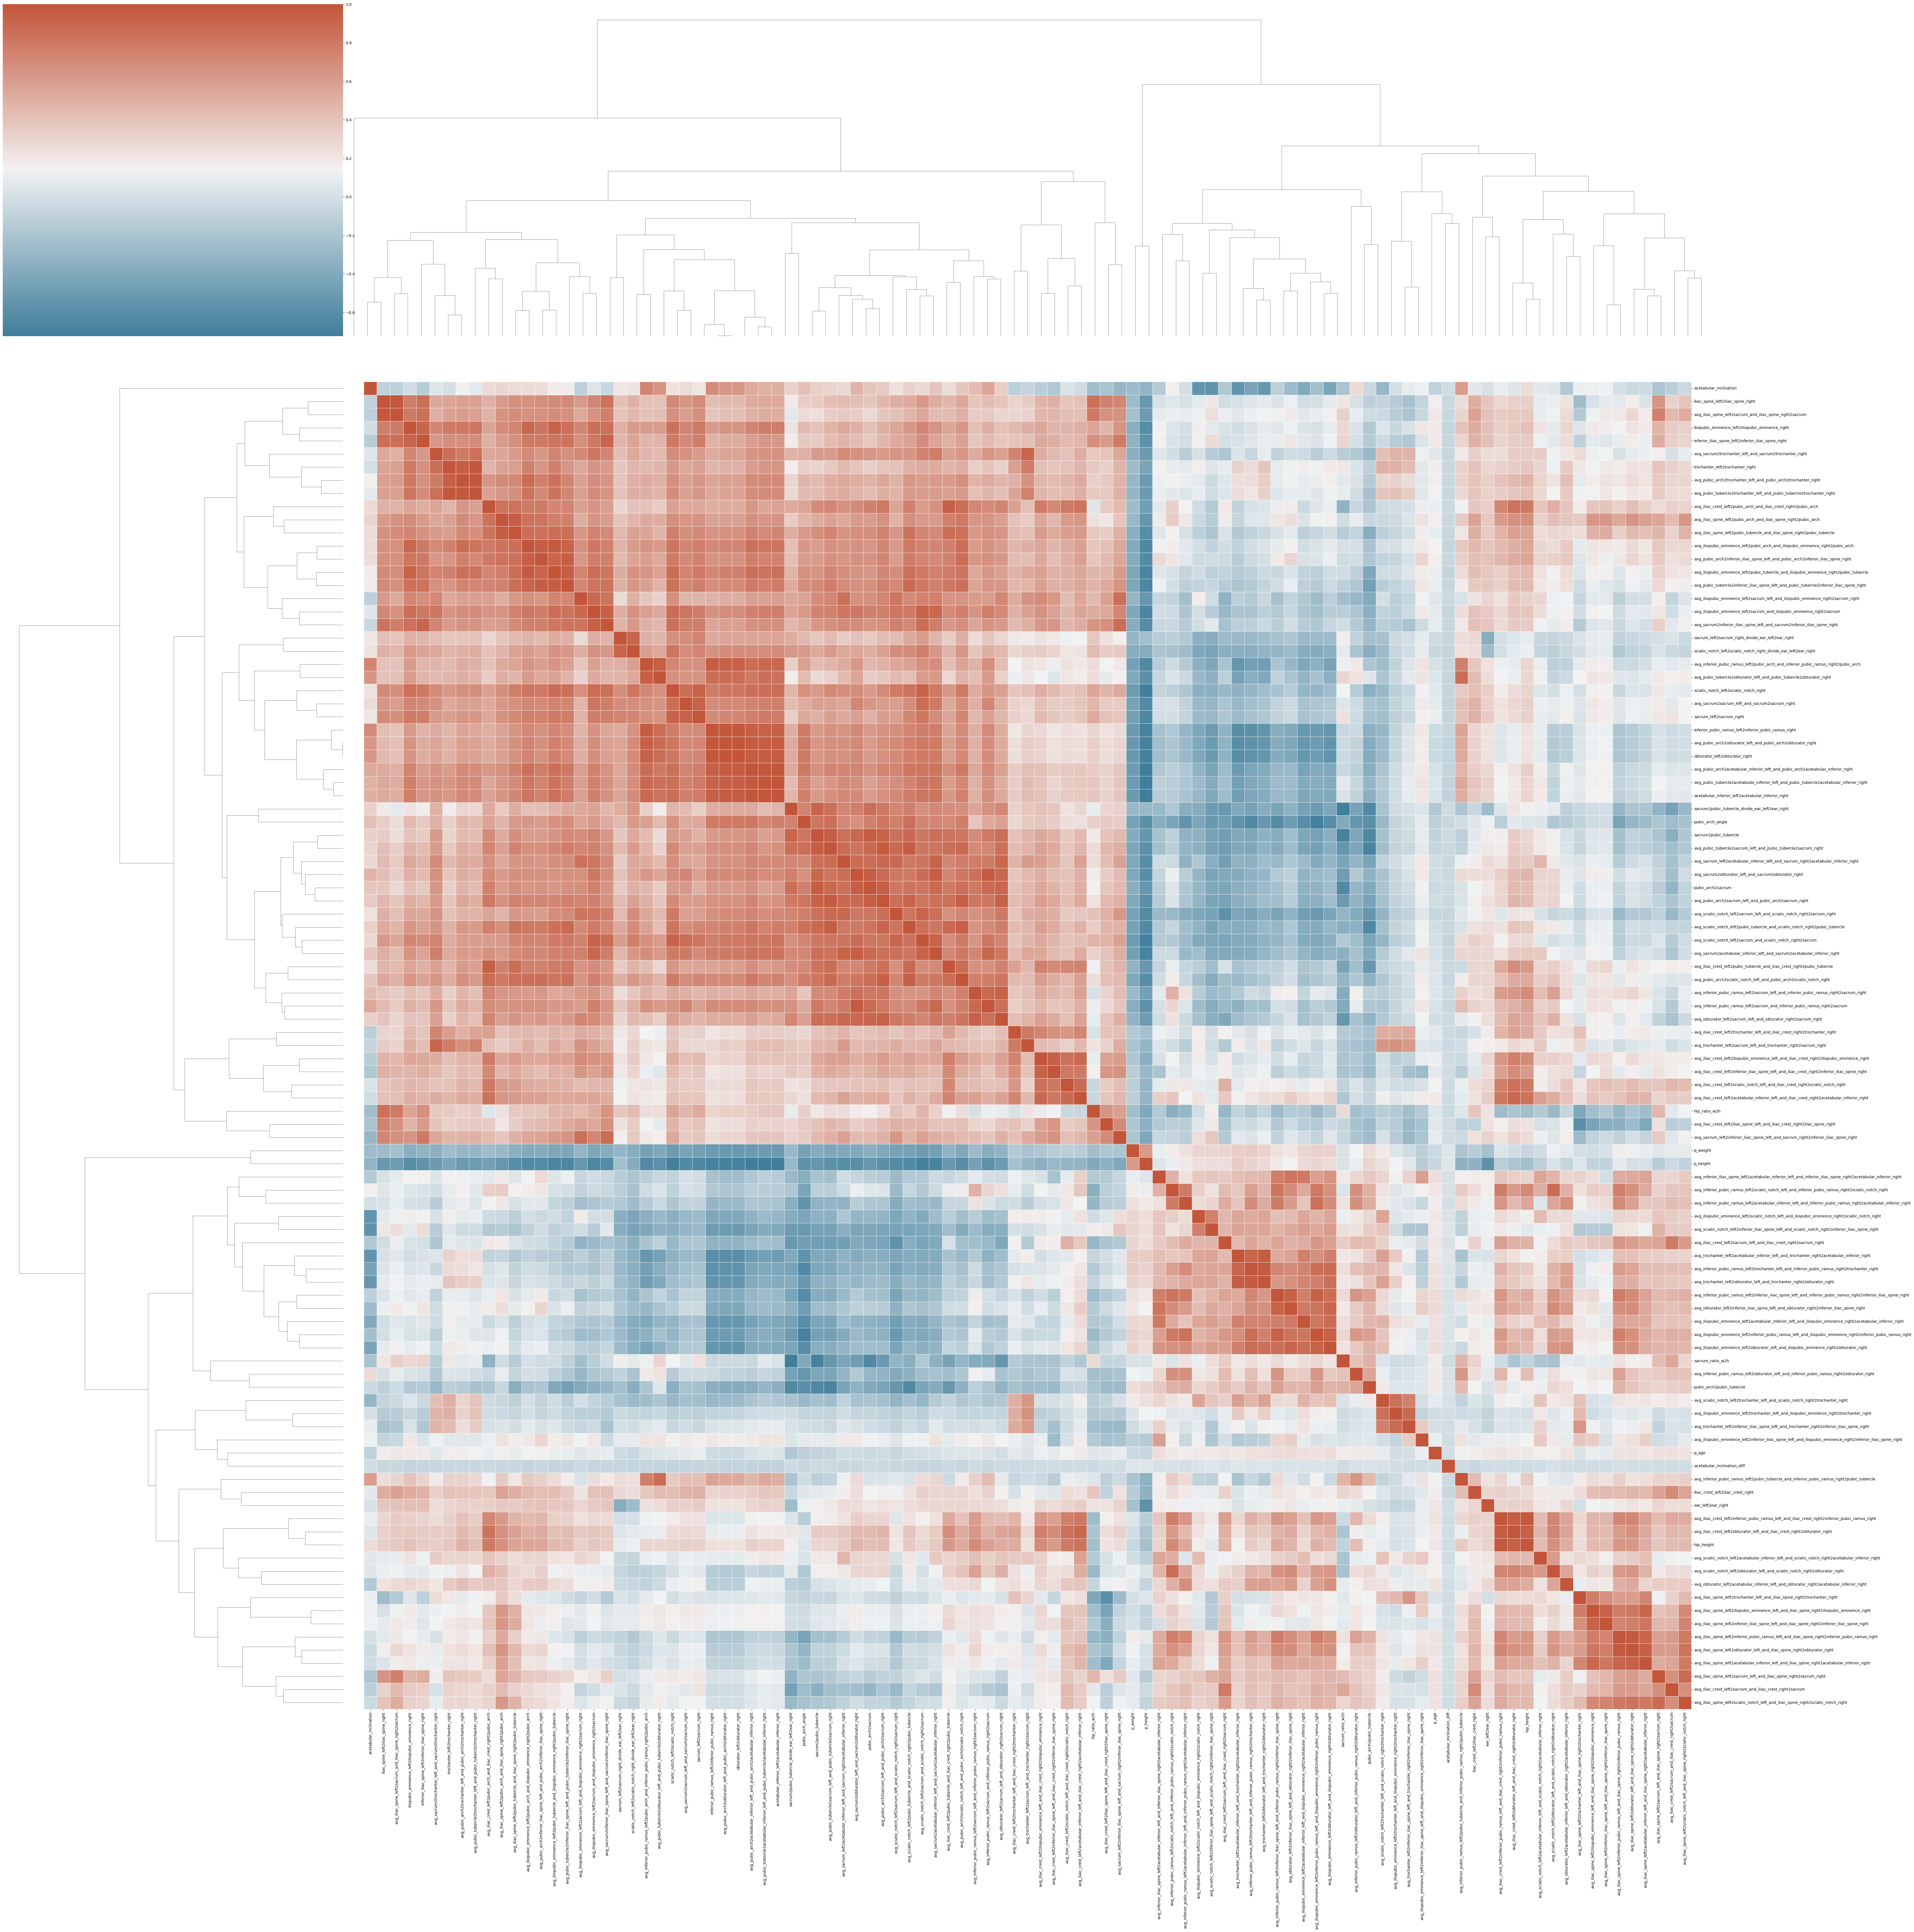

In [99]:
# Create a custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Perform hierarchical clustering and reorder the rows and columns of the correlation matrix based on the clustering
g = sns.clustermap(correlations, cmap=cmap, method='average', metric='euclidean', figsize=(70, 70))

# Reorder the correlations and p_values based on the clustering
reordered_correlations = correlations.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_col.reordered_ind]
reordered_p_values = p_values.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_col.reordered_ind]

# Plot the heatmap with the reordered correlations
ax = g.ax_heatmap
ax.clear()
sns.heatmap(reordered_correlations, cmap=cmap, square=True, linewidths=0.5, cbar=False, ax=ax)

plt.savefig("out_fig/cor_all_phenos.pdf", bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()

##### Phenotype plot for manually selected phenotypes and five new phenotyps added on May 17, 2023

In [112]:
hip_pheno_flt = pd.read_csv('key_results/hip_pheno_23_norm_height_flt_eid_flt.csv', index_col=0); hip_pheno_flt

file_name  Patient EID  \
image_id                                                                   
08760_93  1.2.840.113619.2.110.210419.20160630134650.1.1...      1000276   
12347_93  1.2.840.113619.2.110.210419.20170305174208.1.1...      1000742   
14366_82  1.2.840.113619.2.110.212038.20190307144208.1.1...      1000951   
06366_93  1.2.840.113619.2.110.210419.20151211144320.1.1...      1001025   
14857_93  1.2.840.113619.2.110.210419.20170902122319.1.1...      1001091   
...                                                     ...          ...   
12964_93  1.2.840.113619.2.110.210419.20170418184226.1.1...      6024029   
02193_82  1.2.840.113619.2.110.210419.20180811105258.1.1...      6024037   
11798_82  1.2.840.113619.2.110.212038.20180618143159.1.1...      6024119   
04905_82  1.2.840.113619.2.110.210419.20190219154149.1.1...      6024257   
02700_82  1.2.840.113619.2.110.210419.20180912183226.1.1...      6024532   

         p_sex  p_age  p_weight  p_height  iliac_crest_left2iliac_crest_right  \
image_id                                                                        
08760_93     F   67.0      60.0     159.0                            0.119177   
12347_93     F   67.0      77.0     161.0                            0.123848   
14366_82     M   78.0      60.0     170.0                            0.113652   
06366_93     F   55.0      69.0     167.0                            0.115559   
14857_93     F   60.0      65.0     162.0                            0.119257   
...        ...    ...       ...       ...                                 ...   
12964_93     M   50.0      79.0     180.0                            0.115447   
02193_82     M   61.0      84.0     181.0                            0.109468   
11798_82     M   68.0      70.0     165.0                            0.117222   
04905_82     M   71.0      74.0     169.0                            0.121064   
02700_82     M   67.0      75.0     175.0                            0.112109   

          iliac_crest_left2iliac_spine_left  \
image_id                                      
08760_93                           0.057544   
12347_93                           0.038570   
14366_82                           0.036685   
06366_93                           0.055194   
14857_93                           0.037780   
...                                     ...   
12964_93                           0.030139   
02193_82                           0.046472   
11798_82                           0.031103   
04905_82                           0.039582   
02700_82                           0.043879   

          iliac_crest_left2iliac_spine_right  \
image_id                                       
08760_93                            0.161311   
12347_93                            0.155576   
14366_82                            0.147139   
06366_93                            0.162427   
14857_93                            0.155524   
...                                      ...   
12964_93                            0.141083   
02193_82                            0.139892   
11798_82                            0.146952   
04905_82                            0.151179   
02700_82                            0.150154   

          iliac_crest_left2iliopubic_eminence_left  ...  \
image_id                                            ...   
08760_93                                  0.092231  ...   
12347_93                                  0.084050  ...   
14366_82                                  0.075637  ...   
06366_93                                  0.083520  ...   
14857_93                                  0.079466  ...   
...                                            ...  ...   
12964_93                                  0.076052  ...   
02193_82                                  0.080300  ...   
11798_82                                  0.078930  ...   
04905_82                                  0.079783  ...   
02700_82                                  0.082683  ...   

  

In [113]:
# Manually selected phenotypes
selected_phenos = ['iliac_spine_left2iliac_spine_right',
                   'sacrum_left2sacrum_right',
                   'sciatic_notch_left2sciatic_notch_right',
                   'inferior_iliac_spine_left2inferior_iliac_spine_right',
                   'iliopubic_eminence_left2acetabular_inferior_left',
                   'iliopubic_eminence_right2acetabular_inferior_right',
                   'sacrum2pubic_tubercle',
                   'acetabular_inclination_left',
                   'acetabular_inclination_right',
                   'pubic_arch_angle',
                   'hip_height']

added_phenos = ['sacrum_left2sacrum_right_divide_iliac_spine_left2iliac_spine_right',
                'sciatic_notch_left2sciatic_notch_right_divide_iliac_spine_left2iliac_spine_right',
                'inferior_iliac_spine_left2inferior_iliac_spine_right_divide_iliac_spine_left2iliac_spine_right',
                'angle_pubic_tubercle_iliac_spine_lr',
                'angle_pubic_arch_iliac_spine_lr',
                'sciatic_notch_left2inferior_iliac_spine_left',
                'sciatic_notch_right2inferior_iliac_spine_right',]

sub_pheno = hip_pheno_flt[selected_phenos + added_phenos]

# average of left and right
sub_pheno['iliopubic_eminence2acetabular_inferior'] = \
    (sub_pheno['iliopubic_eminence_left2acetabular_inferior_left'] + sub_pheno['iliopubic_eminence_right2acetabular_inferior_right']) / 2
sub_pheno = sub_pheno.drop(columns=['iliopubic_eminence_left2acetabular_inferior_left', 'iliopubic_eminence_right2acetabular_inferior_right'])

sub_pheno['acetabular_inclination'] = (sub_pheno['acetabular_inclination_left'] + sub_pheno['acetabular_inclination_right']) / 2
sub_pheno = sub_pheno.drop(columns=['acetabular_inclination_left', 'acetabular_inclination_right'])

sub_pheno['sciatic_notch2inferior_iliac_spine'] = \
    (sub_pheno['sciatic_notch_left2inferior_iliac_spine_left'] + sub_pheno['sciatic_notch_right2inferior_iliac_spine_right']) / 2
sub_pheno = sub_pheno.drop(columns=['sciatic_notch_left2inferior_iliac_spine_left', 'sciatic_notch_right2inferior_iliac_spine_right'])

/Users/alexxu/opt/miniconda3/envs/ml/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [114]:
sub_pheno

iliac_spine_left2iliac_spine_right  sacrum_left2sacrum_right  \
image_id                                                                 
08760_93                            0.200967                  0.071055   
12347_93                            0.185548                  0.064384   
14366_82                            0.177139                  0.061380   
06366_93                            0.200323                  0.065121   
14857_93                            0.187855                  0.064835   
...                                      ...                       ...   
12964_93                            0.165582                  0.055498   
02193_82                            0.172255                  0.061097   
11798_82                            0.172106                  0.060732   
04905_82                            0.181884                  0.064083   
02700_82                            0.184276                  0.063434   

          sciatic_notch_left2sciatic_notch_right  \
image_id                                           
08760_93                                0.101333   
12347_93                                0.093308   
14366_82                                0.081983   
06366_93                                0.097650   
14857_93                                0.089264   
...                                          ...   
12964_93                                0.077132   
02193_82                                0.080853   
11798_82                                0.079709   
04905_82                                0.083295   
02700_82                                0.087053   

          inferior_iliac_spine_left2inferior_iliac_spine_right  \
image_id                                                         
08760_93                                           0.146895      
12347_93                                           0.139521      
14366_82                                           0.130800      
06366_93                                           0.146379      
14857_93                                           0.135832      
...                                                     ...      
12964_93                                           0.124881      
02193_82                                           0.129837      
11798_82                                           0.134026      
04905_82                                           0.138060      
02700_82                                           0.140882      

          sacrum2pubic_tubercle  pubic_arch_angle  hip_height  \
image_id                                                        
08760_93               0.071635        142.678044    0.144527   
12347_93               0.074567        141.231641    0.139060   
14366_82               0.058140        116.365190    0.131161   
06366_93               0.080352        159.703035    0.134804   
14857_93               0.061741        131.343366    0.139348   
...                         ...               ...         ...   
12964_93               0.070715        124.424809    0.135128   
02193_82               0.069245        130.924304    0.136438   
11798_82               0.060490        115.933030    0.132217   
04905_82               0.057530        101.631995    0.135202   
02700_82               0.060191        105.144526    0.137170   

          sacrum_left2sacrum_right_divide_iliac_spine_left2iliac_spine_right  \
image_id                                                                       
08760_93                                           0.353565                    
12347_93                                           0.346995                    
14366_82                                           0.346507                    
06366_93                                           0.325081                    
14857_93                                           0.345134                    
...                                                     ...                    
12964_93                 

/var/folders/7f/jzt97g754236ldjj13l5pgd00000gn/T/ipykernel_84850/2974725649.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


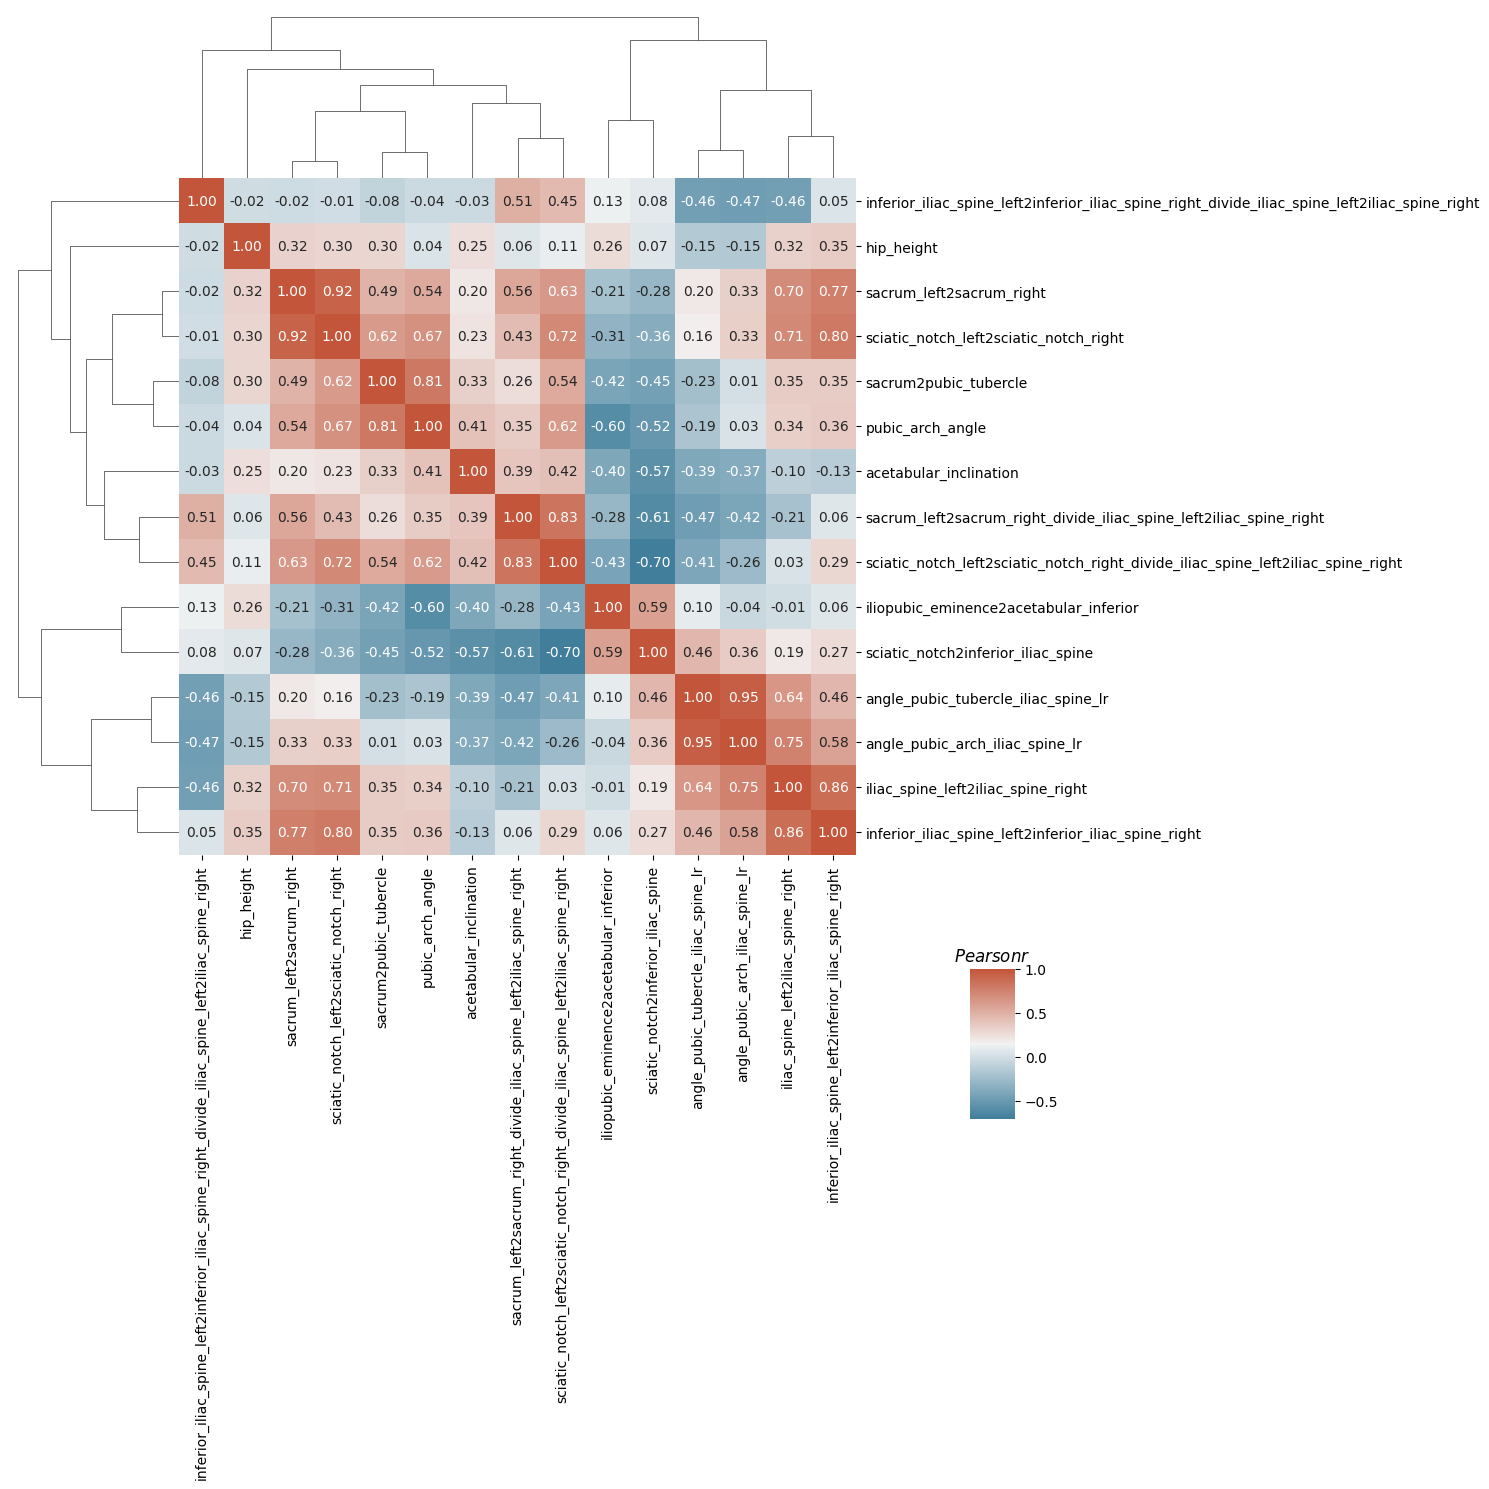

In [107]:
# Calculate pairwise correlations
correlations = sub_pheno.corr()

# Create a custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Perform hierarchical clustering and reorder the rows and columns of the correlation matrix based on the clustering
g = sns.clustermap(correlations, cmap=cmap, method='average', metric='euclidean', figsize=(15, 15), annot=True, fmt=".2f")

x0, _y0, _w, _h = g.cbar_pos

g.ax_cbar.set_position([0.65, 0.25, 0.03, 0.1])
g.ax_cbar.set_title('$Pearsonr$')

# save 
plt.savefig("out_fig/cor_manual_phenos.pdf", bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()

##### Phenotypes correlation of male and female

In [115]:
all_dcm_info = pd.read_csv("all_prediction/all_dcm_info.csv")[['image_id', 'p_sex']]
all_pheno = sub_pheno.merge(all_dcm_info, left_index= True, right_on='image_id', how='inner')

In [119]:
pheno_m = all_pheno[all_pheno['p_sex'] == 'M']
pheno_f = all_pheno[all_pheno['p_sex'] == 'F']

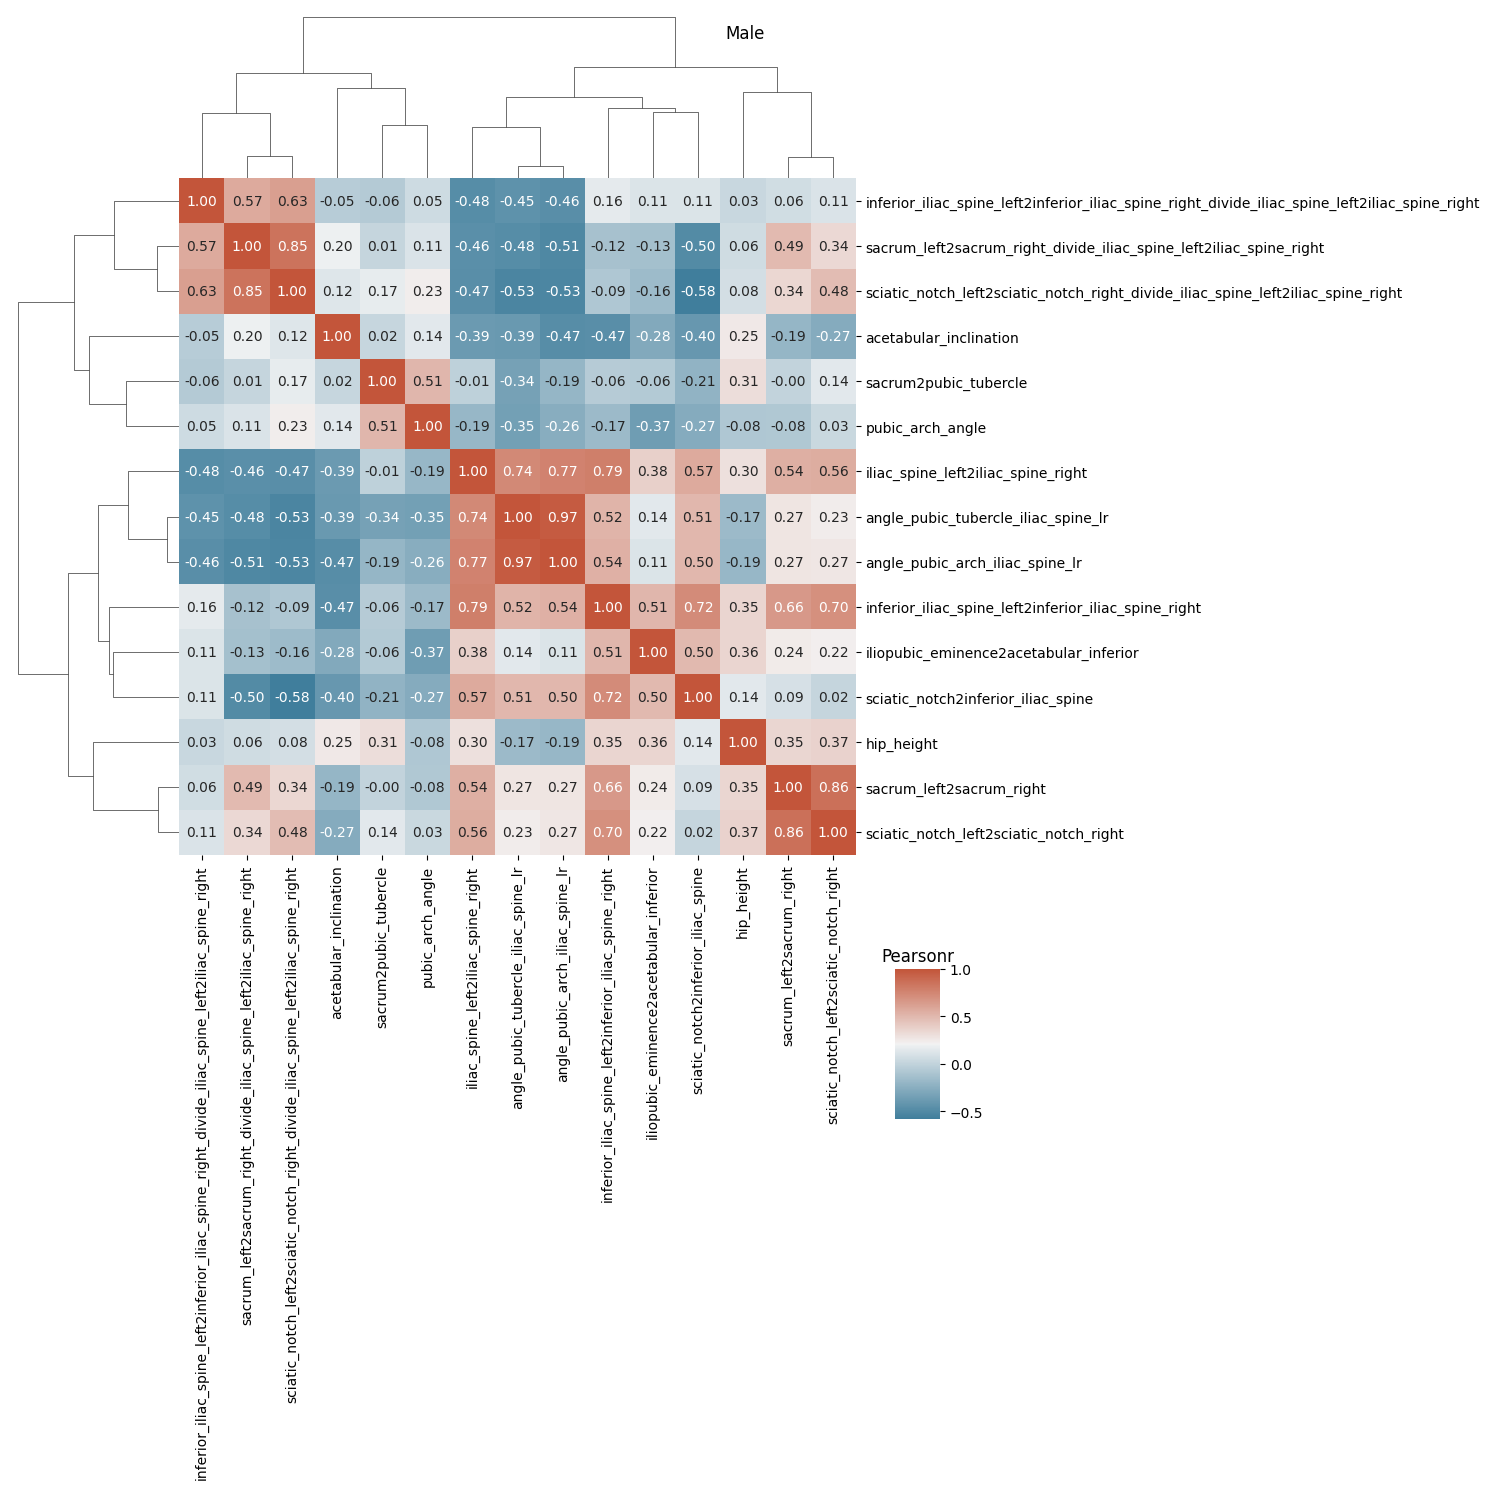

<Figure size 640x480 with 0 Axes>

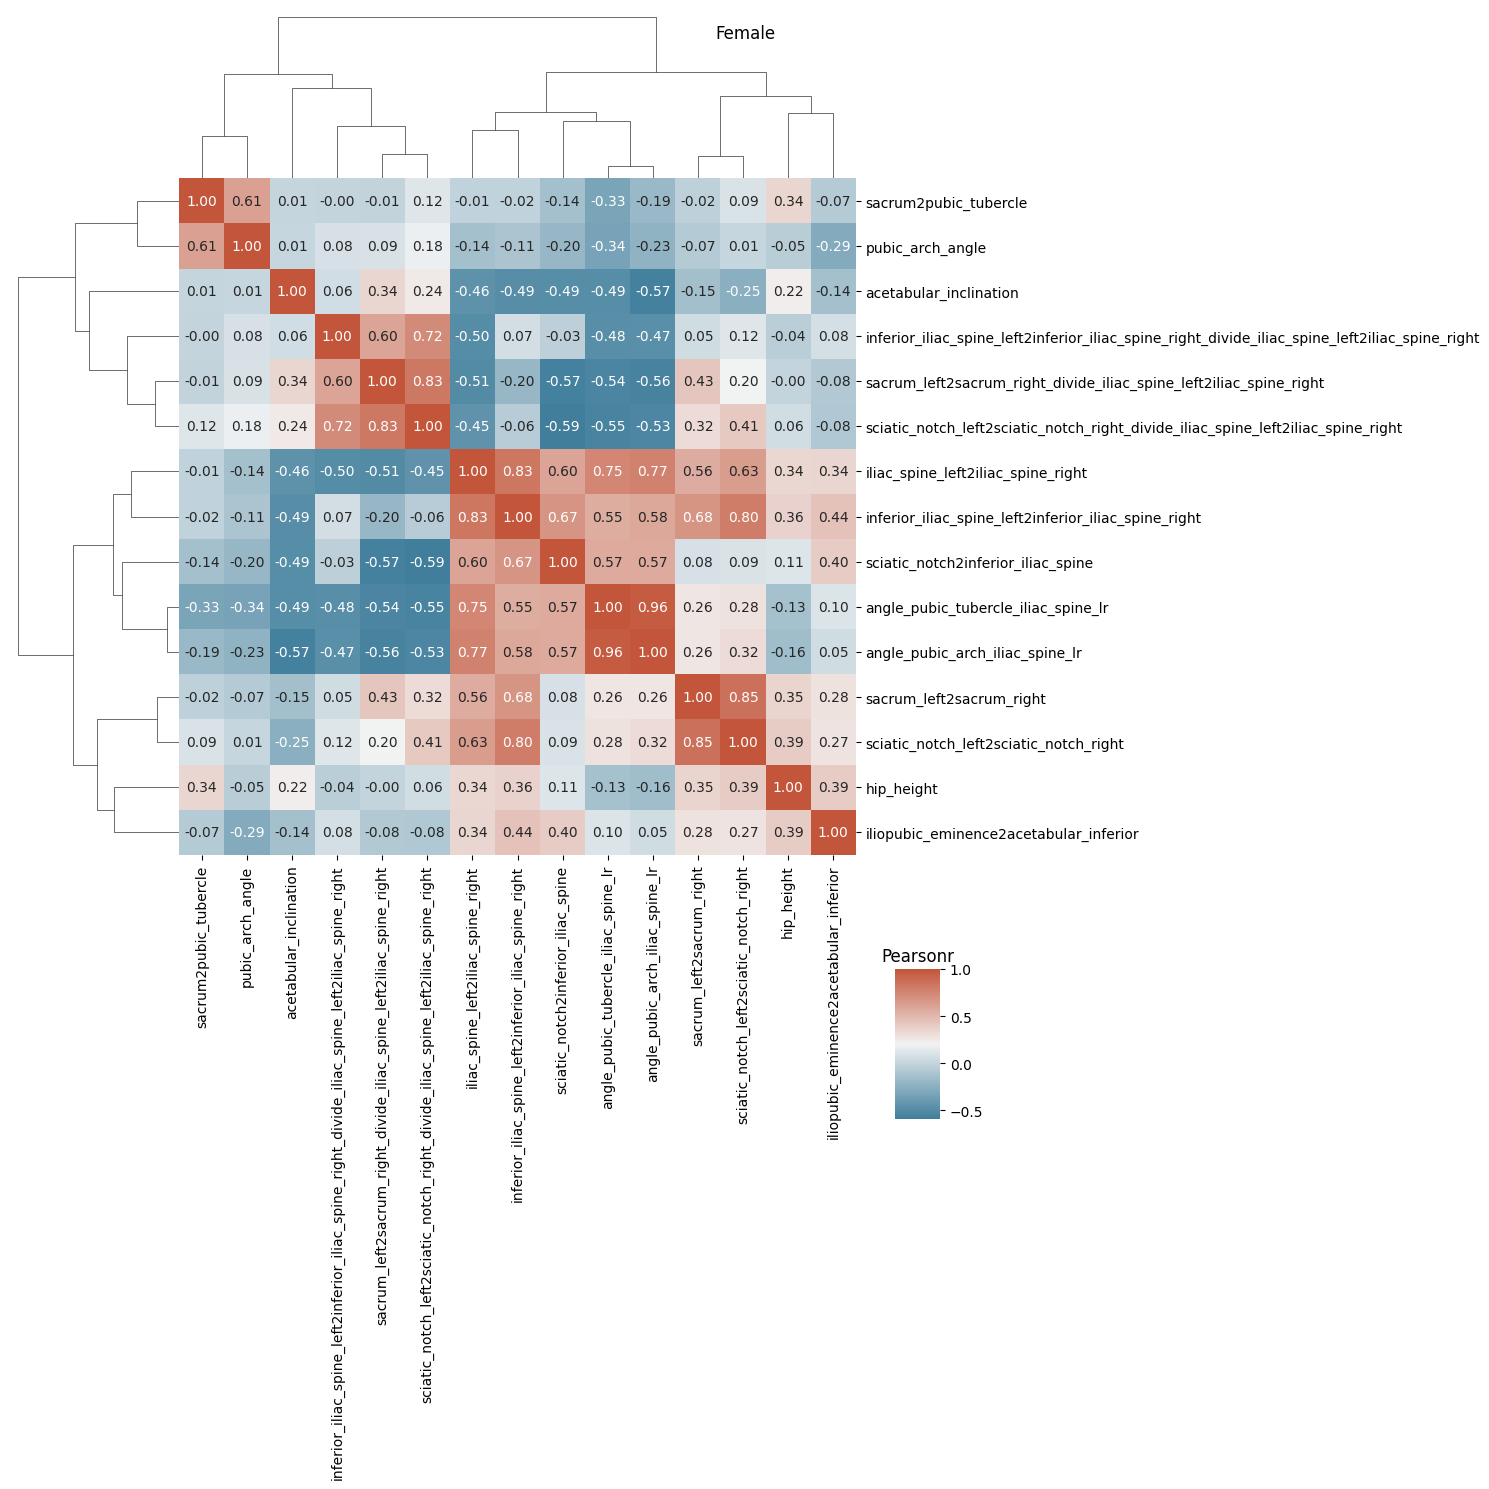

In [127]:
# Create a custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Calculate pairwise correlations
correlations_m = pheno_m.corr()

# Perform hierarchical clustering and reorder the rows and columns of the correlation matrix based on the clustering
g1 = sns.clustermap(correlations_m, cmap=cmap, method='average', metric='euclidean', figsize=(15, 15), annot=True, fmt=".2f")

g1.ax_cbar.set_position([0.6, 0.25, 0.03, 0.1])  # Adjust position of colorbar
g1.ax_cbar.set_title('Pearsonr')
g1.fig.suptitle("Male")

plt.figure()  # create a new figure for the second clustermap

# Calculate pairwise correlations
correlations_f = pheno_f.corr()

# Perform hierarchical clustering and reorder the rows and columns of the correlation matrix based on the clustering
g2 = sns.clustermap(correlations_f, cmap=cmap, method='average', metric='euclidean', figsize=(15, 15), annot=True, fmt=".2f")

g2.ax_cbar.set_position([0.6, 0.25, 0.03, 0.1])  # Adjust position of colorbar
g2.ax_cbar.set_title('Pearsonr')
g2.fig.suptitle("Female")

plt.show()


In [135]:
pheno_m.columns

Index(['iliac_spine_left2iliac_spine_right', 'sacrum_left2sacrum_right',
       'sciatic_notch_left2sciatic_notch_right',
       'inferior_iliac_spine_left2inferior_iliac_spine_right',
       'sacrum2pubic_tubercle', 'pubic_arch_angle', 'hip_height',
       'sacrum_left2sacrum_right_divide_iliac_spine_left2iliac_spine_right',
       'sciatic_notch_left2sciatic_notch_right_divide_iliac_spine_left2iliac_spine_right',
       'inferior_iliac_spine_left2inferior_iliac_spine_right_divide_iliac_spine_left2iliac_spine_right',
       'angle_pubic_tubercle_iliac_spine_lr',
       'angle_pubic_arch_iliac_spine_lr',
       'iliopubic_eminence2acetabular_inferior', 'acetabular_inclination',
       'sciatic_notch2inferior_iliac_spine', 'image_id', 'p_sex'],
      dtype='object')

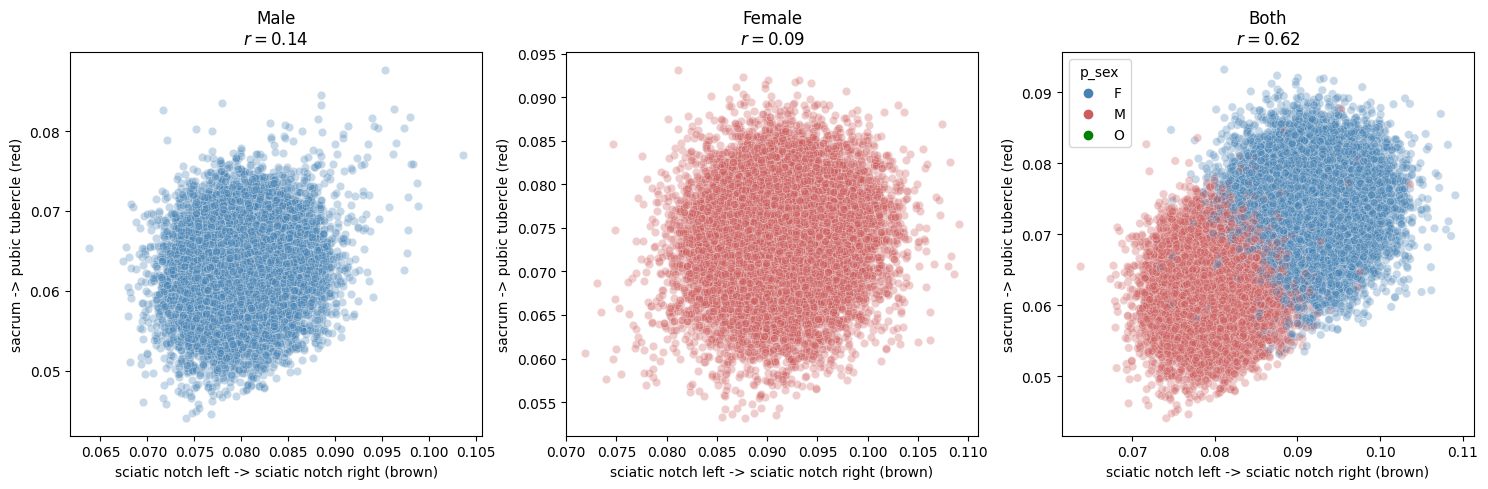

In [154]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x='sciatic_notch_left2sciatic_notch_right', y='sacrum2pubic_tubercle', data=pheno_m, ax=ax[0], alpha = 0.3, color='steelblue')
r = pearsonr(pheno_m['sciatic_notch_left2sciatic_notch_right'], pheno_m['sacrum2pubic_tubercle'])[0]
ax[0].set_title('Male\n$r = {:.2f}$'.format(r))
ax[0].set_xlabel('sciatic notch left -> sciatic notch right (brown)')
ax[0].set_ylabel('sacrum -> pubic tubercle (red)')

sns.scatterplot(x='sciatic_notch_left2sciatic_notch_right', y='sacrum2pubic_tubercle', data=pheno_f, ax=ax[1], alpha = 0.3, color='indianred')
r = pearsonr(pheno_f['sciatic_notch_left2sciatic_notch_right'], pheno_f['sacrum2pubic_tubercle'])[0]
ax[1].set_title('Female\n$r = {:.2f}$'.format(r))
ax[1].set_xlabel('sciatic notch left -> sciatic notch right (brown)')
ax[1].set_ylabel('sacrum -> pubic tubercle (red)')

sns.scatterplot(x='sciatic_notch_left2sciatic_notch_right', y='sacrum2pubic_tubercle', data=all_pheno, ax=ax[2], alpha = 0.3, hue=all_pheno['p_sex'], palette=['steelblue', 'indianred', 'green'])
r = pearsonr(all_pheno['sciatic_notch_left2sciatic_notch_right'], all_pheno['sacrum2pubic_tubercle'])[0]
ax[2].set_title('Both\n$r = {:.2f}$'.format(r))
ax[2].set_xlabel('sciatic notch left -> sciatic notch right (brown)')
ax[2].set_ylabel('sacrum -> pubic tubercle (red)')

plt.tight_layout()

/var/folders/7f/jzt97g754236ldjj13l5pgd00000gn/T/ipykernel_84850/987945297.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


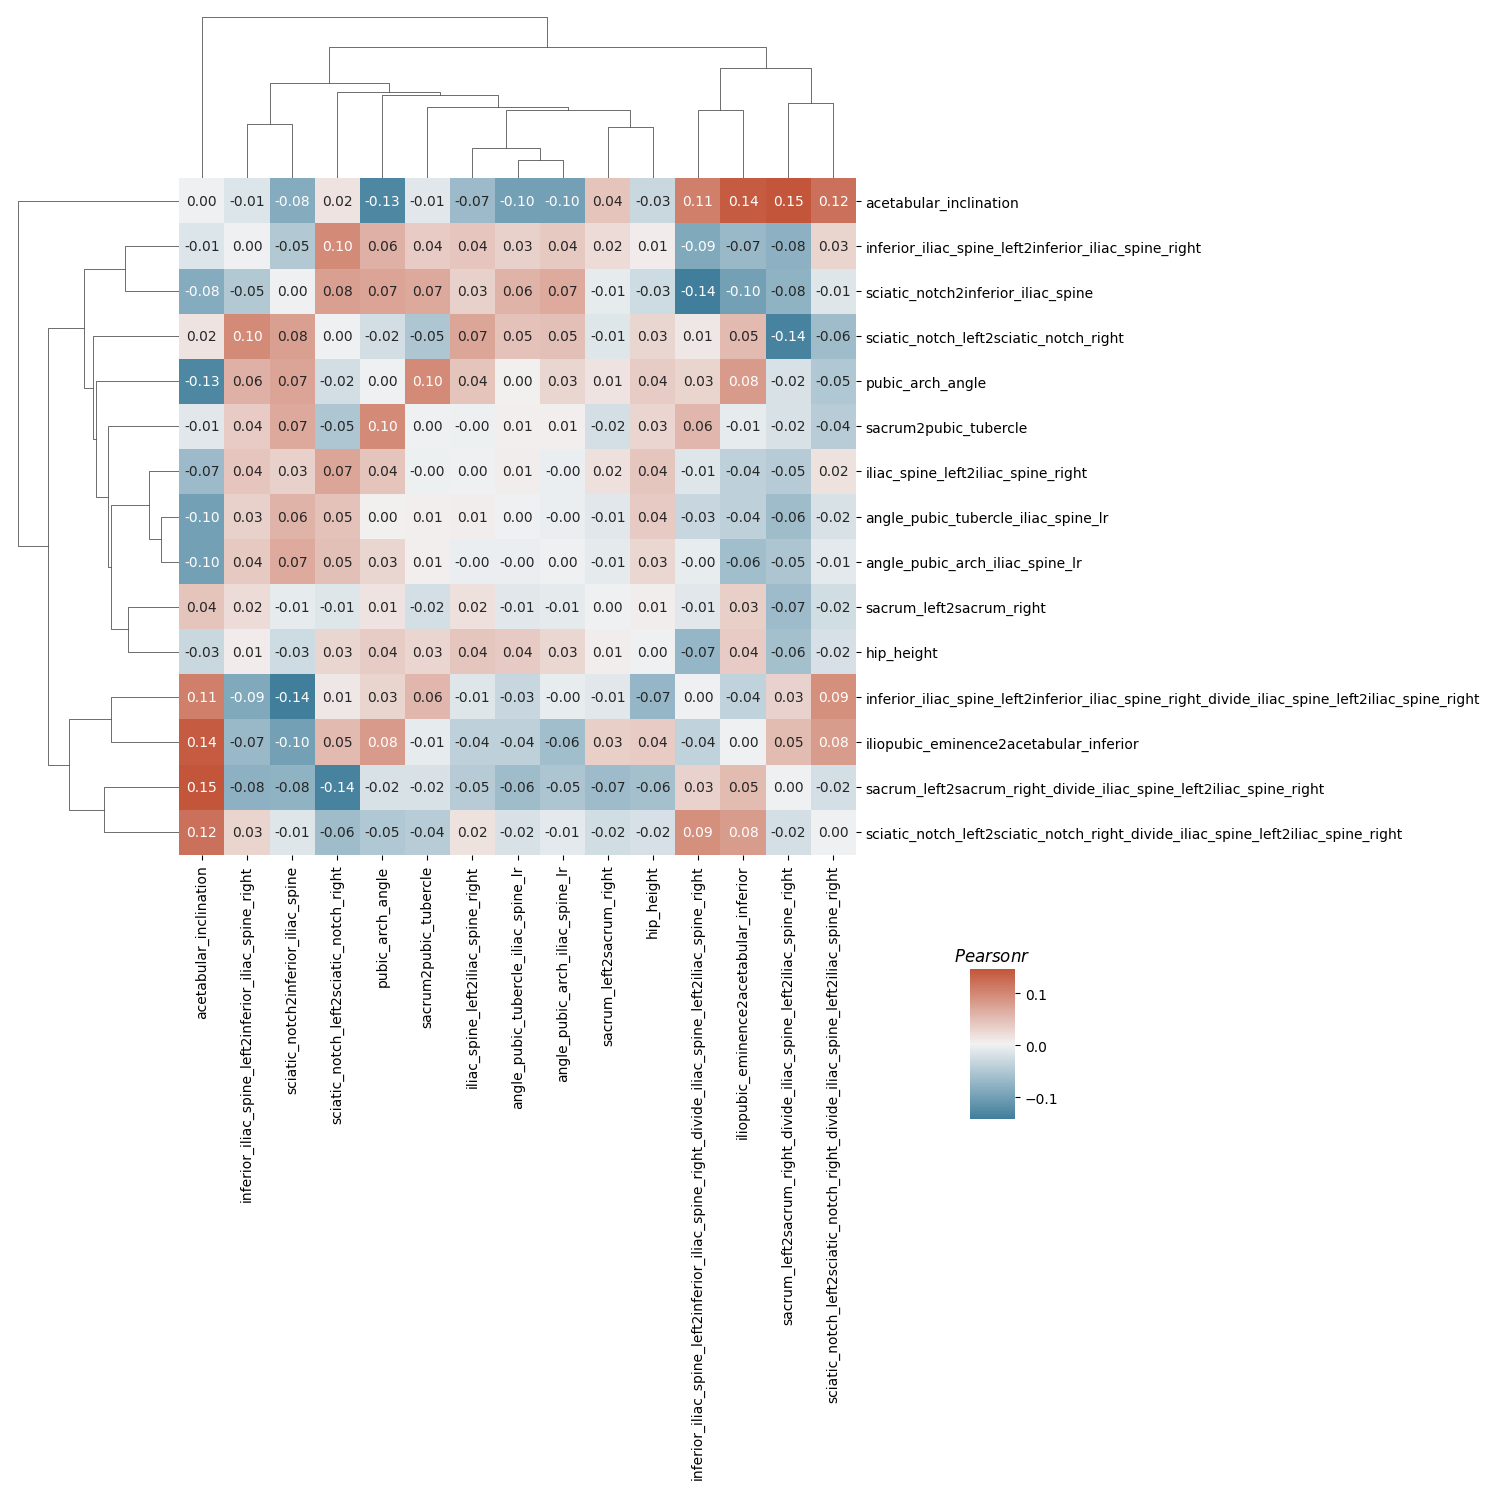

In [134]:
correlations_diff = correlations_f - correlations_m

# Calculate pairwise correlations
correlations = sub_pheno.corr()

# Create a custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Perform hierarchical clustering and reorder the rows and columns of the correlation matrix based on the clustering
g = sns.clustermap(correlations_diff, cmap=cmap, method='average', metric='euclidean', figsize=(15, 15), annot=True, fmt=".2f")

x0, _y0, _w, _h = g.cbar_pos

g.ax_cbar.set_position([0.65, 0.25, 0.03, 0.1])
g.ax_cbar.set_title('$Pearsonr$')

# save 
# plt.savefig("out_fig/cor_manual_phenos.pdf", bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()

#### Group phenotypes based on their correlation

In [8]:
correlations = pd.read_csv('key_results/cor_all_phenos.csv', index_col=0); correlations

p_age  p_weight  \
p_age                                               1.000000 -0.046124   
p_weight                                           -0.046124  1.000000   
p_height                                           -0.052019  0.621142   
iliac_crest_left2iliac_crest_right                  0.159642 -0.141731   
avg_iliac_crest_left2iliac_spine_left_and_iliac...  0.064113 -0.190189   
...                                                      ...       ...   
sacrum_left2sacrum_right_divide_ear_left2ear_right -0.032403 -0.302435   
sciatic_notch_left2sciatic_notch_right_divide_e... -0.056472 -0.377776   
pubic_arch_angle                                   -0.112579 -0.459278   
acetabular_inclination_diff                        -0.007872  0.042318   
acetabular_inclination                             -0.097755 -0.268631   

                                                    p_height  \
p_age                                              -0.052019   
p_weight                                            0.621142   
p_height                                            1.000000   
iliac_crest_left2iliac_crest_right                 -0.337324   
avg_iliac_crest_left2iliac_spine_left_and_iliac... -0.341213   
...                                                      ...   
sacrum_left2sacrum_right_divide_ear_left2ear_right -0.232703   
sciatic_notch_left2sciatic_notch_right_divide_e... -0.378866   
pubic_arch_angle                                   -0.580457   
acetabular_inclination_diff                         0.046826   
acetabular_inclination                             -0.316290   

                                                    iliac_crest_left2iliac_crest_right  \
p_age                                                                         0.159642   
p_weight                                                                     -0.141731   
p_height                                                                     -0.337324   
iliac_crest_left2iliac_crest_right                                            1.000000   
avg_iliac_crest_left2iliac_spine_left_and_iliac...                           -0.099104   
...                                                                                ...   
sacrum_left2sacrum_right_divide_ear_left2ear_right                            0.275684   
sciatic_notch_left2sciatic_notch_right_divide_e...                            0.250552   
pubic_arch_angle                                                              0.050645   
acetabular_inclination_diff                                                  -0.054183   
acetabular_inclination                                                        0.069575   

                                                    avg_iliac_crest_left2iliac_spine_left_and_iliac_crest_right2iliac_spine_right  \
p_age                                                                                        0.064113                               
p_weight                                                                                    -0.190189                               
p_height                                                                                    -0.341213                               
iliac_crest_left2iliac_crest_right                                                          -0.099104                               
avg_iliac_crest_left2iliac_spine_left_and_iliac...                                           1.000000                               
...                                                                                               ...                               
sacrum_left2sacrum_right_divide_ear_left2ear_right                                           0.237394                               
sciatic_notch_left2sciatic_notch_right_divide_e...                                           0.347836                               
pubic_arch_angle                                                                             0.359764                  

In [60]:
correlations_melt = correlations.reset_index().melt(id_vars='index', var_name='index2', value_name='correlation'); correlations_melt

index  \
0                                                  p_age   
1                                               p_weight   
2                                               p_height   
3                     iliac_crest_left2iliac_crest_right   
4      avg_iliac_crest_left2iliac_spine_left_and_ilia...   
...                                                  ...   
10196  sacrum_left2sacrum_right_divide_ear_left2ear_r...   
10197  sciatic_notch_left2sciatic_notch_right_divide_...   
10198                                   pubic_arch_angle   
10199                        acetabular_inclination_diff   
10200                             acetabular_inclination   

                       index2  correlation  
0                       p_age     1.000000  
1                       p_age    -0.046124  
2                       p_age    -0.052019  
3                       p_age     0.159642  
4                       p_age     0.064113  
...                       ...          ...  
10196  acetabular_inclination     0.192880  
10197  acetabular_inclination     0.223311  
10198  acetabular_inclination     0.410051  
10199  acetabular_inclination    -0.022836  
10200  acetabular_inclination     1.000000  

[10201 rows x 3 columns]

In [58]:
correlations_melt.to_csv('key_results/cor_all_phenos_melt.csv')

##### hierarchical clustering

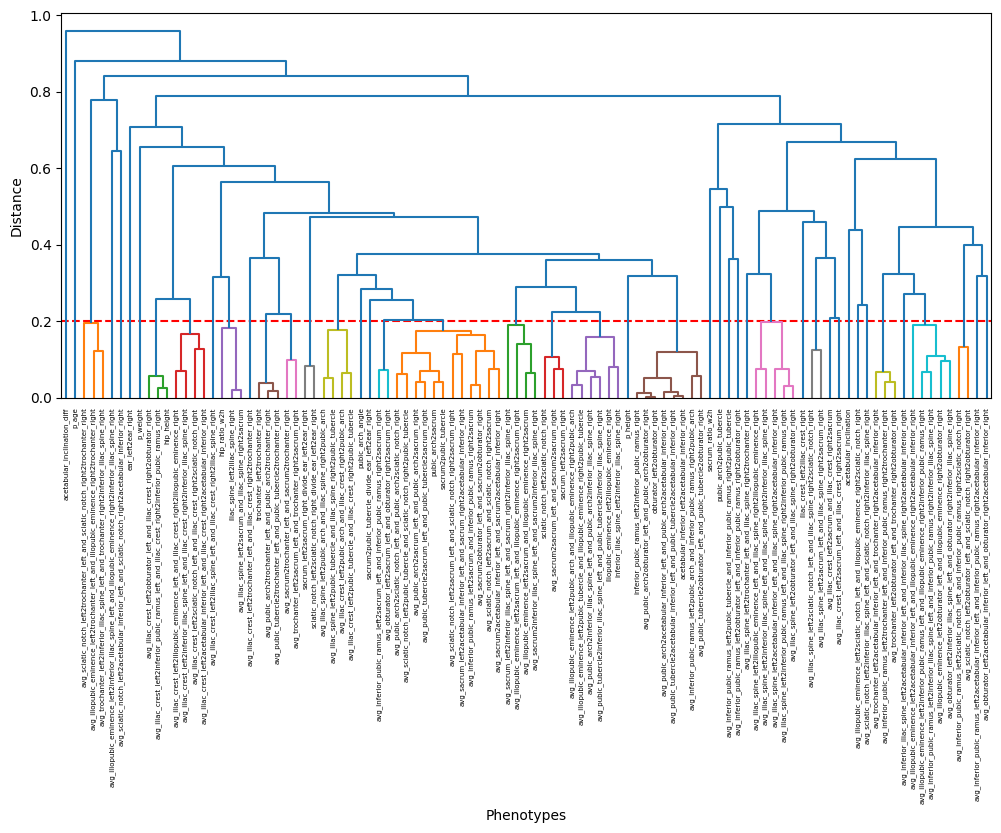

In [9]:
distance_matrix = 1 - correlations.abs()
condensed_matrix = squareform(distance_matrix)
Z = linkage(condensed_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(12, 5))

# Add a horizontal line at the threshold
threshold = 0.2
plt.axhline(y=threshold, color='red', linestyle='--')

dendrogram(
    Z,
    labels=distance_matrix.index,
    leaf_rotation=90,
    color_threshold=threshold
)
plt.xlabel("Phenotypes")
plt.ylabel("Distance")

plt.savefig("out_fig/dendrogram_all_phenos.pdf", bbox_inches='tight')

##### get groups

In [35]:
# Set specific threshold value
threshold = 0.7

# Obtain clusters using the specific threshold
clusters = fcluster(Z, threshold, criterion='distance')

# Create a DataFrame with cluster assignments
cluster_df = pd.DataFrame({'phenotype': distance_matrix.index, 'cluster': clusters})

# Create the output format as a 2D list of groups
grouped = cluster_df.groupby('cluster')['phenotype'].apply(list)
groups = [group for _, group in grouped.items()]

In [36]:
len(groups), groups

(8,
 [['avg_iliopubic_eminence_left2trochanter_left_and_iliopubic_eminence_right2trochanter_right',
   'avg_sciatic_notch_left2trochanter_left_and_sciatic_notch_right2trochanter_right',
   'avg_trochanter_left2inferior_iliac_spine_left_and_trochanter_right2inferior_iliac_spine_right'],
  ['avg_iliopubic_eminence_left2inferior_iliac_spine_left_and_iliopubic_eminence_right2inferior_iliac_spine_right',
   'avg_sciatic_notch_left2acetabular_inferior_left_and_sciatic_notch_right2acetabular_inferior_right'],
  ['p_weight',
   'p_height',
   'avg_iliac_crest_left2iliac_spine_left_and_iliac_crest_right2iliac_spine_right',
   'avg_iliac_crest_left2iliopubic_eminence_left_and_iliac_crest_right2iliopubic_eminence_right',
   'avg_iliac_crest_left2inferior_pubic_ramus_left_and_iliac_crest_right2inferior_pubic_ramus_right',
   'avg_iliac_crest_left2pubic_arch_and_iliac_crest_right2pubic_arch',
   'avg_iliac_crest_left2sciatic_notch_left_and_iliac_crest_right2sciatic_notch_right',
   'avg_iliac_crest

In [37]:
r = []
for group in groups:
    for pheno1 in group:
        for pheno2 in group:
            if pheno1 != pheno2:
                if correlations.at[pheno1, pheno2] <= 0.8:
                    r.append(correlations.at[pheno1, pheno2])
sorted(r)

[-0.7234216409540748,
 -0.7234216409540748,
 -0.7193686625880104,
 -0.7193686625880104,
 -0.7191942226109115,
 -0.7191942226109115,
 -0.7065240090584541,
 -0.7065240090584541,
 -0.7017883290594458,
 -0.7017883290594458,
 -0.693513687591136,
 -0.693513687591136,
 -0.6933349812758727,
 -0.6933349812758727,
 -0.6866188690051616,
 -0.6866188690051616,
 -0.6778075131957717,
 -0.6778075131957717,
 -0.668697367299889,
 -0.668697367299889,
 -0.661192324941667,
 -0.661192324941667,
 -0.6606432387438267,
 -0.6606432387438267,
 -0.6465575399274336,
 -0.6465575399274336,
 -0.6422192103292061,
 -0.6422192103292061,
 -0.639648424739984,
 -0.639648424739984,
 -0.6297790214912318,
 -0.6297790214912318,
 -0.6292998316335175,
 -0.6292998316335175,
 -0.62873542711296,
 -0.62873542711296,
 -0.6270712901730697,
 -0.6270712901730697,
 -0.6194850046444337,
 -0.6194850046444337,
 -0.6143375452600466,
 -0.6143375452600466,
 -0.6043505822266656,
 -0.6043505822266656,
 -0.602824683506737,
 -0.602824683506737,
 -

#### Get phenotypes with highest h2g

##### Average left and right

In [38]:
# load h2g for each phenotyps
h2g_df = pd.read_csv('key_results/h2g/h2g_20230505.csv', index_col=0)
h2g_dict = h2g_df.to_dict(orient='index') 

In [39]:
len(h2g_dict.keys())

267

In [40]:
hip_pheno_flt = pd.read_csv('key_results/hip_pheno_23_norm_height_flt_eid_flt.csv'); hip_pheno_flt

image_id                                          file_name  \
0      08760_93  1.2.840.113619.2.110.210419.20160630134650.1.1...   
1      12347_93  1.2.840.113619.2.110.210419.20170305174208.1.1...   
2      14366_82  1.2.840.113619.2.110.212038.20190307144208.1.1...   
3      06366_93  1.2.840.113619.2.110.210419.20151211144320.1.1...   
4      14857_93  1.2.840.113619.2.110.210419.20170902122319.1.1...   
...         ...                                                ...   
30992  12964_93  1.2.840.113619.2.110.210419.20170418184226.1.1...   
30993  02193_82  1.2.840.113619.2.110.210419.20180811105258.1.1...   
30994  11798_82  1.2.840.113619.2.110.212038.20180618143159.1.1...   
30995  04905_82  1.2.840.113619.2.110.210419.20190219154149.1.1...   
30996  02700_82  1.2.840.113619.2.110.210419.20180912183226.1.1...   

       Patient EID p_sex  p_age  p_weight  p_height  \
0          1000276     F   67.0      60.0     159.0   
1          1000742     F   67.0      77.0     161.0   
2          1000951     M   78.0      60.0     170.0   
3          1001025     F   55.0      69.0     167.0   
4          1001091     F   60.0      65.0     162.0   
...            ...   ...    ...       ...       ...   
30992      6024029     M   50.0      79.0     180.0   
30993      6024037     M   61.0      84.0     181.0   
30994      6024119     M   68.0      70.0     165.0   
30995      6024257     M   71.0      74.0     169.0   
30996      6024532     M   67.0      75.0     175.0   

       iliac_crest_left2iliac_crest_right  iliac_crest_left2iliac_spine_left  \
0                                0.119177                           0.057544   
1                                0.123848                           0.038570   
2                                0.113652                           0.036685   
3                                0.115559                           0.055194   
4                                0.119257                           0.037780   
...                                   ...                                ...   
30992                            0.115447                           0.030139   
30993                            0.109468                           0.046472   
30994                            0.117222                           0.031103   
30995                            0.121064                           0.039582   
30996                            0.112109                           0.043879   

       iliac_crest_left2iliac_spine_right  ...  hip_height  sacrum_ratio_w2h  \
0                                0.161311  ...    0.144527          1.414572   
1                                0.155576  ...    0.139060          1.251339   
2                                0.147139  ...    0.131161          1.410102   
3                                0.162427  ...    0.134804          1.215281   
4                                0.155524  ...    0.139348          1.445791   
...                                   ...  ...         ...               ...   
30992                            0.141083  ...    0.135128          1.090737   
30993                            0.139892  ...    0.136438          1.167638   
30994                            0.146952  ...    0.132217          1.317724   
30995                            0.151179  ...    0.135202          1.447859   
30996                            0.150154  ...    0.137170          1.446266   

       hip_ratio_w2h  sacrum2pubic_tubercle_divide_ear_left2ear_right  \
0           1.390511                                         0.834930   
1           1.334308                                         0.886952   
2           1.350552                                         0.700372   
3           1.486036                                         1.043131   
4           1.348099                                         0.796500   
...              ...                                              ...   
30992       1.225370                                         0.959074   

In [41]:
pheno_cols = hip_pheno_flt.columns[4:]
len(pheno_cols)

267

In [42]:
# make sure h2g keys are the same as phenotypes
for i in pheno_cols:
    if i not in h2g_dict.keys():
        print(i)

for i in h2g_dict.keys():
    if i not in pheno_cols:
        print(i)

In [43]:
# make sure the order of h2g keys are the same as phenotypes

h2g_dict = {key: h2g_dict[key] for key in pheno_cols}

In [44]:
averages_dict = {}

def calculate_average(dict, key1, key2):
    if key2 is None:
        return
    avg_key_name = f'avg_{key1}_and_{key2}'
    averages_dict[avg_key_name] = {'var': (h2g_dict[key1]['var'] + h2g_dict[key2]['var']) / 2,
                                   'se': (h2g_dict[key1]['se'] + h2g_dict[key2]['se']) / 2}

def match_columns(key):
    pattern1 = re.compile(r'^(.*?)_(left|right)2(.*?)_(left|right)$')
    pattern2 = re.compile(r'^(.*?)_(left|right)2(.*?)$')
    pattern3 = re.compile(r'^(.*?)2(.*?)_(left|right)$')
    match1 = pattern1.match(key)
    match2 = pattern2.match(key)
    match3 = pattern3.match(key)
    return match1, match2, match3

handled_keys = []

for key in h2g_dict.keys():
    match1, match2, match3 = match_columns(key)
    
    if match1:
        base_name, side1, target_name, side2 = match1.groups()
        # remove diagonal
        if side1 != side2 and base_name != target_name:
            if "divide" not in key:
                continue
        other_side1 = 'left' if side1 == 'right' else 'right'
        other_side2 = 'left' if side2 == 'right' else 'right'
        other_key = f'{base_name}_{other_side1}2{target_name}_{other_side2}'
        
        if other_key in h2g_dict.keys():
            if key not in handled_keys and other_key not in handled_keys:
                calculate_average(h2g_dict, key, other_key)
                handled_keys.append(key)
                handled_keys.append(other_key)
        else:
            averages_dict[key] = h2g_dict[key]
            
    elif match2:
        base_name, side1, target_name = match2.groups()
        other_side = 'left' if side1 == 'right' else 'right'
        other_key = f'{base_name}_{other_side}2{target_name}'
        
        if other_key in h2g_dict.keys():
            if key not in handled_keys and other_key not in handled_keys:
                calculate_average(h2g_dict, key, other_key)
                handled_keys.append(key)
                handled_keys.append(other_key)
        else:
            averages_dict[key] = h2g_dict[key]
            
    elif match3:
        base_name, target_name, side2 = match3.groups()
        other_side = 'left' if side2 == 'right' else 'right'
        other_key = f'{base_name}2{target_name}_{other_side}'
        
        if other_key in h2g_dict.keys():
            if key not in handled_keys and other_key not in handled_keys:
                calculate_average(h2g_dict, key, other_key)
                handled_keys.append(key)
                handled_keys.append(other_key)
        else:
            averages_dict[key] = h2g_dict[key]
    else:
        averages_dict[key] = h2g_dict[key]

In [45]:
# left and right angle averages
averages_dict['acetabular_inclination'] = {"var":(averages_dict['acetabular_inclination_left']['var'] + averages_dict['acetabular_inclination_right']['var']) / 2,
                                           "se":(averages_dict['acetabular_inclination_left']['se'] + averages_dict['acetabular_inclination_right']['se']) / 2}

# remove two angles columns
averages_dict.pop('acetabular_inclination_left')
averages_dict.pop('acetabular_inclination_right')

{'var': 0.185187, 'se': 0.012212}

In [46]:
len(averages_dict.keys())

101

In [47]:
len(averages_df.columns)

101

In [48]:
# to test if the h2g avg left and right result align with the phenotypes
[i for i in averages_dict.keys() if i not in averages_df.columns]

[]

In [49]:
averages_dict

{'p_age': {'var': 0.003603, 'se': 0.010242},
 'p_weight': {'var': 0.213718, 'se': 0.01227},
 'p_height': {'var': 0.464455, 'se': 0.011938},
 'iliac_crest_left2iliac_crest_right': {'var': 0.315832, 'se': 0.012397},
 'avg_iliac_crest_left2iliac_spine_left_and_iliac_crest_right2iliac_spine_right': {'var': 0.2858495,
  'se': 0.0125025},
 'avg_iliac_crest_left2iliopubic_eminence_left_and_iliac_crest_right2iliopubic_eminence_right': {'var': 0.2958815,
  'se': 0.012475},
 'avg_iliac_crest_left2inferior_pubic_ramus_left_and_iliac_crest_right2inferior_pubic_ramus_right': {'var': 0.33446,
  'se': 0.0124385},
 'avg_iliac_crest_left2pubic_arch_and_iliac_crest_right2pubic_arch': {'var': 0.3224865,
  'se': 0.0124645},
 'avg_iliac_crest_left2sciatic_notch_left_and_iliac_crest_right2sciatic_notch_right': {'var': 0.3180715,
  'se': 0.012468},
 'avg_iliac_crest_left2sacrum_and_iliac_crest_right2sacrum': {'var': 0.25473,
  'se': 0.012338},
 'avg_iliac_crest_left2pubic_tubercle_and_iliac_crest_right2pubic

##### Get highest phenotypes

In [50]:
# Get the phenotypes with the highest h2g in each group
highest_h2g_phenotypes = {}

for group in groups:
    max_h2g = -np.inf
    max_phenotype = None
    for phenotype in group:
        if phenotype in averages_dict and averages_dict[phenotype]['var'] > max_h2g:
            max_h2g = averages_dict[phenotype]['var']
            max_phenotype = phenotype
    if max_phenotype is not None:
        highest_h2g_phenotypes[max_phenotype] = {}
        highest_h2g_phenotypes[max_phenotype]['var'] = max_h2g
        highest_h2g_phenotypes[max_phenotype]['se'] = averages_dict[max_phenotype]['se']

In [51]:
len(highest_h2g_phenotypes.keys())

8

In [52]:
list(highest_h2g_phenotypes.keys())

['avg_sciatic_notch_left2trochanter_left_and_sciatic_notch_right2trochanter_right',
 'avg_sciatic_notch_left2acetabular_inferior_left_and_sciatic_notch_right2acetabular_inferior_right',
 'p_height',
 'ear_left2ear_right',
 'sacrum_ratio_w2h',
 'avg_iliac_spine_left2obturator_left_and_iliac_spine_right2obturator_right',
 'p_age',
 'acetabular_inclination_diff']

In [53]:
selected_pheno = pd.DataFrame(highest_h2g_phenotypes).T; selected_pheno

var        se
avg_sciatic_notch_left2trochanter_left_and_scia...  0.360966  0.012353
avg_sciatic_notch_left2acetabular_inferior_left...  0.229534  0.012361
p_height                                            0.464455  0.011938
ear_left2ear_right                                  0.339479  0.012375
sacrum_ratio_w2h                                    0.303619  0.012525
avg_iliac_spine_left2obturator_left_and_iliac_s...  0.322744  0.012424
p_age                                               0.003603  0.010242
acetabular_inclination_diff                         0.002385  0.010547

In [32]:
selected_pheno.shape

(15, 2)

In [38]:
selected_pheno.to_csv('key_results/highest_h2g_phenotypes_in_groups.csv')

### Phenotype correlation plot

In [3]:
hip_pheno_male_flt = pd.read_csv('key_results/hip_select_pheno_male_flt.csv')
hip_pheno_female_flt = pd.read_csv('key_results/hip_select_pheno_female_flt.csv')

In [6]:
correlations_f = hip_pheno_female_flt.iloc[:, 4:].corr()

pelvic_height  pelvic_width  \
pelvic_height                          1.000000      0.320323   
pelvic_width                           0.320323      1.000000   
pelvic_inlet_width                     0.380696      0.626713   
iliac_flare_ratio                      0.055893     -0.466700   
oblique_pelvic_inlet_length            0.321585     -0.039787   
iliac_flare_angle                     -0.141460      0.753485   
subpubic_angle                        -0.057971     -0.161027   
ear_left2ear_right                     0.300282      0.360824   
trochanter_left2trochanter_right       0.371006      0.488322   
iliac_isthmus_breadth                  0.094428      0.604112   
acetabular_diameter                    0.373053      0.340491   
acetabular_inclination                 0.056499     -0.540664   

                                  pelvic_inlet_width  iliac_flare_ratio  \
pelvic_height                               0.380696           0.055893   
pelvic_width                                0.626713          -0.466700   
pelvic_inlet_width                          1.000000           0.395311   
iliac_flare_ratio                           0.395311           1.000000   
oblique_pelvic_inlet_length                 0.055641           0.109908   
iliac_flare_angle                           0.293447          -0.554225   
subpubic_angle                             -0.021358           0.165402   
ear_left2ear_right                          0.334563          -0.044430   
trochanter_left2trochanter_right            0.616947           0.124866   
iliac_isthmus_breadth                       0.098260          -0.597133   
acetabular_diameter                         0.284247          -0.076885   
acetabular_inclination                     -0.242924           0.360898   

                                  oblique_pelvic_inlet_length  \
pelvic_height                                        0.321585   
pelvic_width                                        -0.039787   
pelvic_inlet_width                                   0.055641   
iliac_flare_ratio                                    0.109908   
oblique_pelvic_inlet_length                          1.000000   
iliac_flare_angle                                   -0.333281   
subpubic_angle                                       0.605007   
ear_left2ear_right                                   0.040708   
trochanter_left2trochanter_right                     0.008805   
iliac_isthmus_breadth                               -0.149908   
acetabular_diameter                                 -0.082801   
acetabular_inclination                               0.104410   

                                  iliac_flare_angle  subpubic_angle  \
pelvic_height                             -0.141460       -0.057971   
pelvic_width                               0.753485       -0.161027   
pelvic_inlet_width                         0.293447       -0.021358   
iliac_flare_ratio                         -0.554225        0.165402   
oblique_pelvic_inlet_length               -0.333281        0.605007   
iliac_flare_angle                          1.000000       -0.344585   
subpubic_angle                            -0.344585        1.000000   
ear_left2ear_right                         0.172477       -0.060475   
trochanter_left2trochanter_right           0.175619       -0.008453   
iliac_isthmus_breadth                      0.573323       -0.196394   
acetabular_diameter                        0.109675       -0.282018   
acetabular_inclination                    -0.538695        0.232806   

                                  ear_left2ear_right  \
pelvic_height                               0.300282   
pelvic_width                                0.360824   
pelvic_inlet_width                          0.334563   
iliac_flare_ratio                          -0.044430   
oblique_pelvic_inlet_length                 0.040708   
iliac_flare_angle                           0.172477   
subpubic_angle                             -0.0604

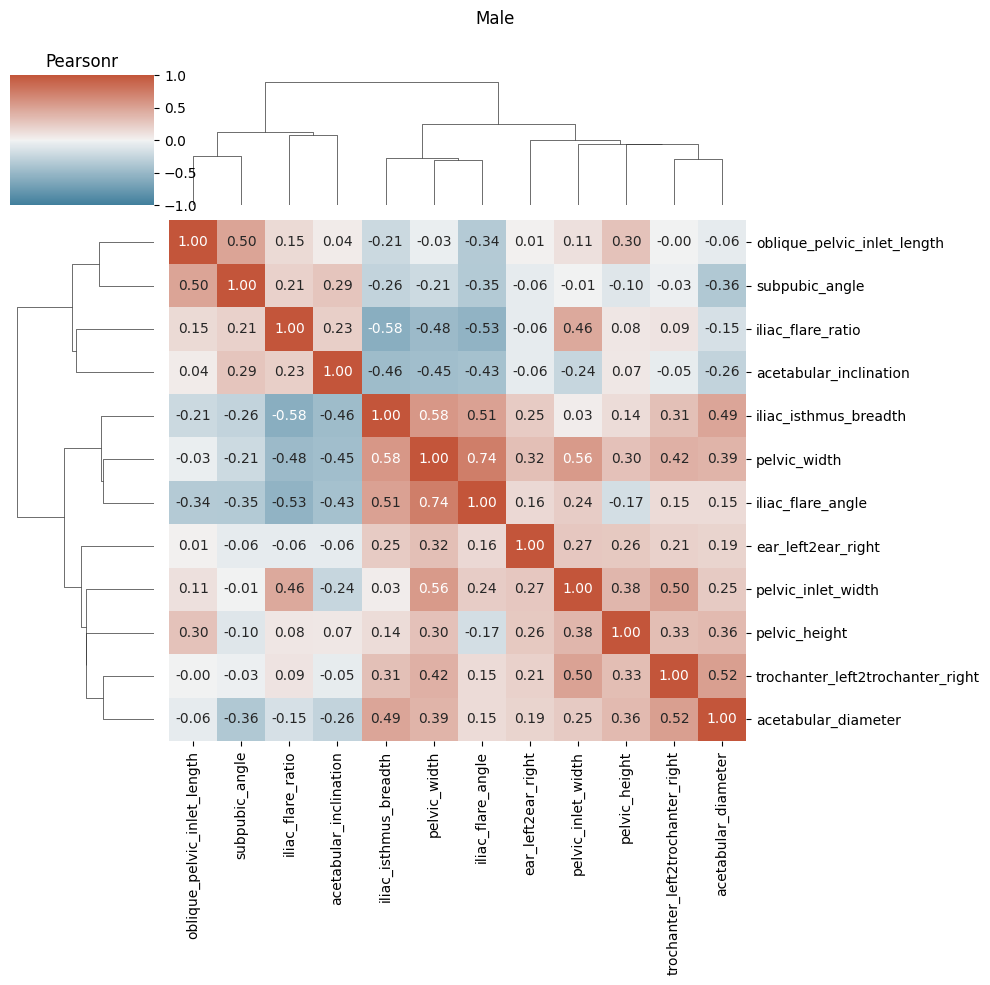

<Figure size 640x480 with 0 Axes>

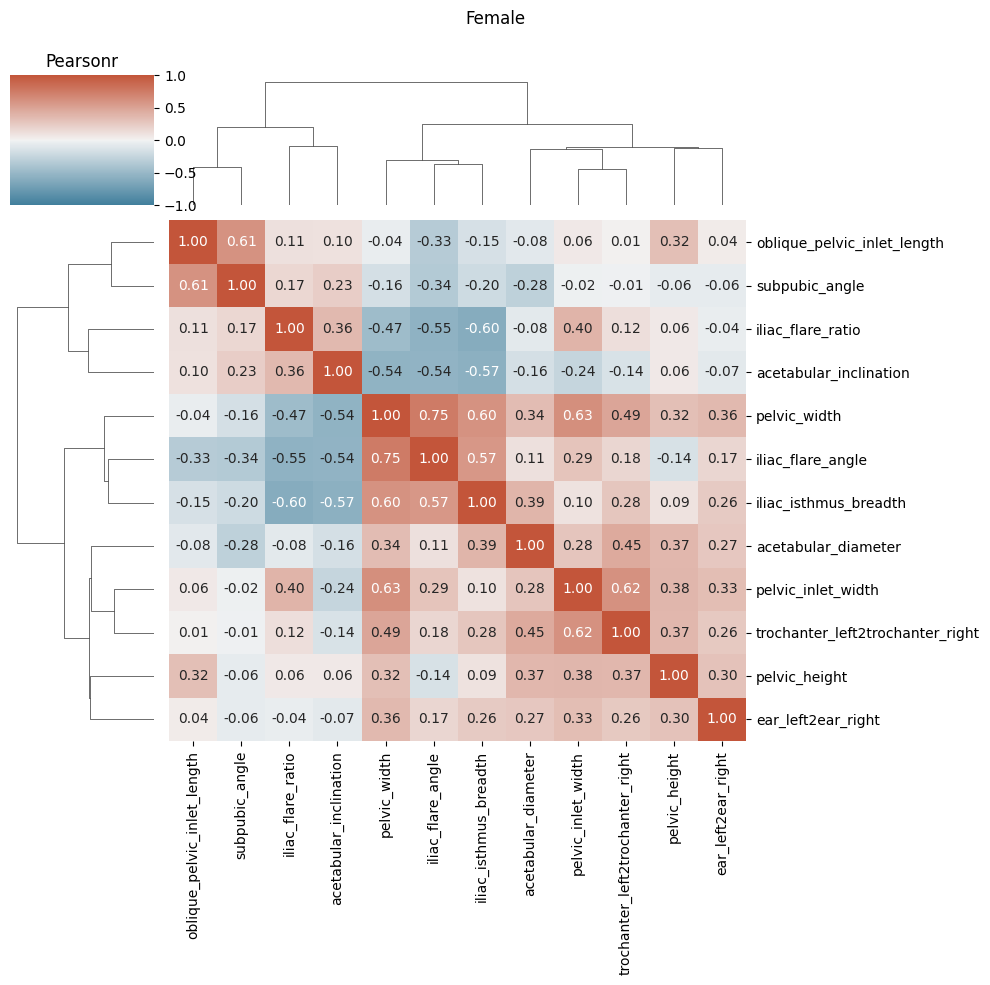

In [13]:
# Create a custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Calculate pairwise correlations
correlations_m = hip_pheno_male_flt.iloc[:, 4:].corr()

# Perform hierarchical clustering and reorder the rows and columns of the correlation matrix based on the clustering
g1 = sns.clustermap(correlations_m, cmap=cmap, method='average', metric='euclidean', figsize=(10, 10), annot=True, fmt=".2f", vmin=-1, vmax=1)

g1.ax_cbar.set_position([0.1, 0.9, 0.03, 0.1])  # Adjust position of colorbar
g1.ax_cbar.set_title('Pearsonr')
g1.fig.suptitle("Male")
plt.tight_layout()
plt.savefig("out_fig/pheno_cor_male_clustermap.pdf", bbox_inches="tight")

plt.figure()  # create a new figure for the second clustermap

# Calculate pairwise correlations
correlations_f = hip_pheno_female_flt.iloc[:, 4:].corr()

# Perform hierarchical clustering and reorder the rows and columns of the correlation matrix based on the clustering
g2 = sns.clustermap(correlations_f, cmap=cmap, method='average', metric='euclidean', figsize=(10, 10), annot=True, fmt=".2f", vmin=-1, vmax=1)

g2.ax_cbar.set_position([0.1, 0.9, 0.03, 0.1])   # Adjust position of colorbar
g2.ax_cbar.set_title('Pearsonr')
g2.fig.suptitle("Female")
plt.tight_layout()
plt.savefig("out_fig/pheno_cor_female_clustermap.pdf", bbox_inches="tight")

### plot relationship between age and pelvic width

In [8]:
eids = pd.read_csv('key_results/eids_from_emily.csv')['eid'].tolist()

hip_pheno_gwas_male = pd.read_csv('key_results/hip_select_pheno_cm_male_residual.csv')
hip_pheno_gwas_male.sort_values(by = ['eid', 'file_name'], ascending=[True, True], inplace=True)
hip_pheno_gwas_male.drop_duplicates(subset=['eid'], keep='first', inplace=True)
hip_pheno_gwas_male = hip_pheno_gwas_male[hip_pheno_gwas_male['eid'].isin(eids)]

hip_pheno_gwas_female = pd.read_csv('key_results/hip_select_pheno_cm_female_residual.csv')
hip_pheno_gwas_female.sort_values(by = ['eid', 'file_name'], ascending=[True, True], inplace=True)
hip_pheno_gwas_female.drop_duplicates(subset=['eid'], keep='first', inplace=True)
hip_pheno_gwas_female = hip_pheno_gwas_female[hip_pheno_gwas_female['eid'].isin(eids)]

print(f"Male dataframe shape: {hip_pheno_gwas_male.shape}")
print(f"Female dataframe shape: {hip_pheno_gwas_female.shape}")

Male dataframe shape: (14845, 22)
Female dataframe shape: (15432, 22)


In [4]:
# merge age column
fid_info = pd.read_csv('../UKB_xray_image_info/fids/fid_disease/fid_info.csv')[['eid', 'age']]
hip_pheno_gwas_male = fid_info.merge(hip_pheno_gwas_male, on='eid', how='inner')
hip_pheno_gwas_female = fid_info.merge(hip_pheno_gwas_female, on='eid', how='inner')
print(f"Male dataframe shape: {hip_pheno_gwas_male.shape}")
print(f"Female dataframe shape: {hip_pheno_gwas_female.shape}")

Male dataframe shape: (14845, 23)
Female dataframe shape: (15432, 23)


In [9]:
hip_pheno_gwas = pd.concat([hip_pheno_gwas_male, hip_pheno_gwas_female], axis=0)

In [10]:
hip_pheno_gwas

image_id                                          file_name      eid  \
0      14366_82  1.2.840.113619.2.110.212038.20190307144208.1.1...  1000951   
1      01877_82  1.2.840.113619.2.110.210419.20180720150454.1.1...  1001512   
2      15479_93  1.2.840.113619.2.110.210419.20171011165132.1.1...  1001719   
3      10557_82  1.2.840.113619.2.110.212038.20180228105159.1.1...  1001921   
4      01561_82  1.2.840.113619.2.110.210419.20180630141714.1.1...  1001950   
...         ...                                                ...      ...   
15427  19122_82  1.2.840.113619.2.110.212174.20190308174807.1.1...  6022917   
15428  16309_93  1.2.840.113619.2.110.210419.20171202183632.1.1...  6023431   
15429  00223_82  1.2.840.113619.2.110.210419.20180327185012.1.1...  6023703   
15430  01579_82  1.2.840.113619.2.110.210419.20180701163545.1.1...  6023791   
15431  04448_82  1.2.840.113619.2.110.210419.20190117162724.1.1...  6023985   

       sex  standing_height  weight      bmi  age  pelvic_height  \
0        1            166.0    60.8  22.0642   66      -0.913660   
1        1            169.0    77.3  27.0649   57       0.193035   
2        1            177.0    89.4  28.5359   65       3.124994   
3        1            166.0    64.2  23.2980   52      -0.349695   
4        1            165.0    89.6  32.9109   53      -0.017495   
...    ...              ...     ...      ...  ...            ...   
15427    0            168.0    65.6  23.2426   64      -0.623252   
15428    0            170.0    61.5  21.2803   43      -0.638581   
15429    0            150.0    66.5  29.5556   42       0.220859   
15430    0            174.0    63.2  20.8746   44       0.275261   
15431    0            164.6    71.4  26.3535   55       0.281095   

       pelvic_width  ...  oblique_pelvic_inlet_length  iliac_flare_angle  \
0          0.111391  ...                    -0.554035          97.533181   
1          0.530275  ...                    -1.076779          95.714405   
2          3.094970  ...                     1.782235          95.958279   
3         -1.138843  ...                    -0.540391          95.473293   
4         -0.493548  ...                    -0.065030          95.952879   
...             ...  ...                          ...                ...   
15427     -0.974972  ...                    -0.131040          91.622387   
15428     -1.549593  ...                     1.562998          90.205445   
15429     -4.066178  ...                    -0.012839          87.546753   
15430     -1.327527  ...                     0.316779          85.839271   
15431     -0.605667  ...                     0.019561          91.554095   

       subpubic_angle  ear_left2ear_right  trochanter_left2trochanter_right  \
0          116.365190            0.247386                          0.598340   
1          117.491690           -0.002836                          0.900195   
2          116.185643           -0.644993                          3.796965   
3          116.159185            0.616148                          0.284552   
4          130.647738            0.191457                         -0.514730   
...               ...                 ...                               ...   
15427      148.537788           -0.411186                          0.050851   
15428      157.984881           -0.948935                         -2.842893   
15429      128.013696            0.253896                         -1.746464   
15430      141.797305           -0.493732                          0.010047   
15431      129.150241            0.577898                         -0.210492   

       shoulder_width  arm_devide_torso  iliac_isthmus_breadth  \
0           -1.806779          1.067168              -0.272584   
1            0.292887          0.933102               0.170560   
2            3.215719          0.978208               0.188204   
3           -5.283324          1.014700              -0.198818   
4            0.699032          0.978756          

In [11]:
# Bin the ages into 5-year increments
hip_pheno_gwas['sex'] = hip_pheno_gwas['sex'].map({1: 'Male', 0: 'Female'})

bins = range(int(hip_pheno_gwas['age'].min()), int(hip_pheno_gwas['age'].max()) + 5, 5)
labels = [f'{i}-{i+5}' for i in bins[:-1]]
hip_pheno_gwas['age_bins'] = pd.cut(hip_pheno_gwas['age'], bins=bins, labels=labels, include_lowest=True)

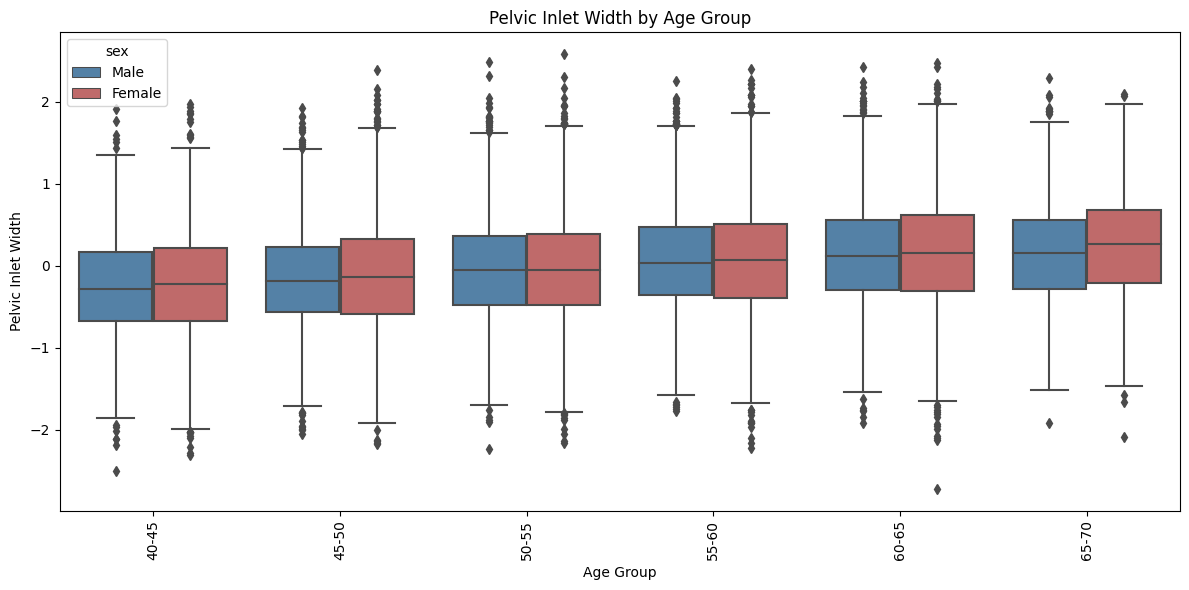

In [12]:
# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_bins', y='pelvic_inlet_width', hue = 'sex', data=hip_pheno_gwas, palette={'Male': 'steelblue', 'Female': 'indianred'})
plt.xticks(rotation=90) # This ensures that your x-axis labels don't overlap
plt.title('Pelvic Inlet Width by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Pelvic Inlet Width')
plt.tight_layout()
plt.show()

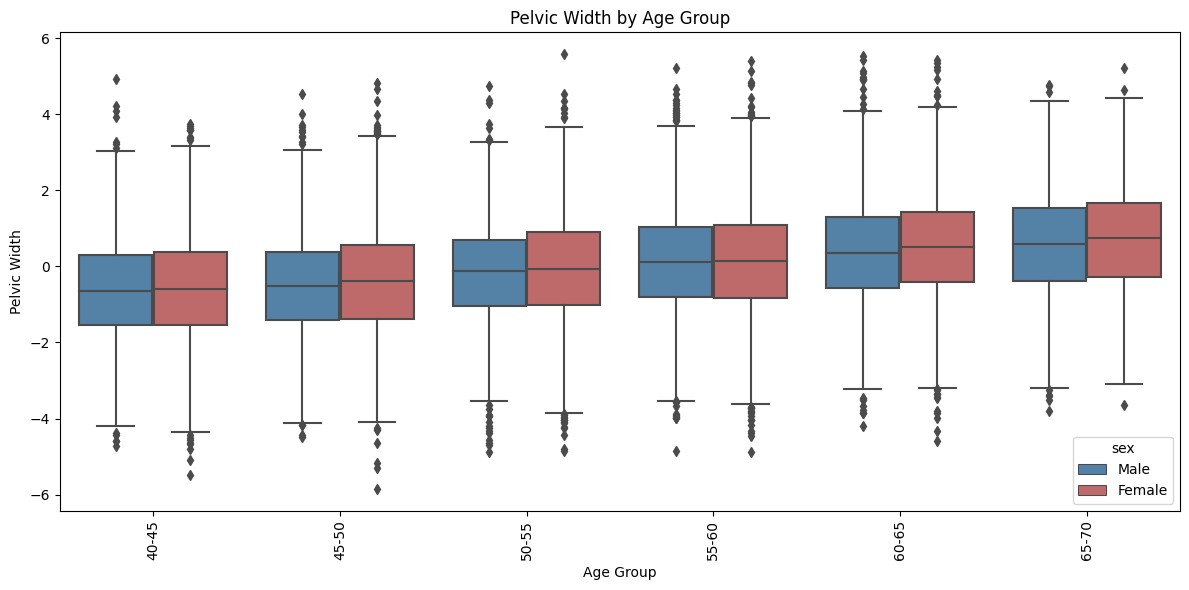

In [13]:
# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_bins', y='pelvic_width', hue = 'sex', data=hip_pheno_gwas, palette={'Male': 'steelblue', 'Female': 'indianred'})
plt.xticks(rotation=90) # This ensures that your x-axis labels don't overlap
plt.title('Pelvic Width by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Pelvic Width')
plt.tight_layout()
plt.show()